In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
sys.path.insert(0, os.path.dirname(os.path.abspath("")))

In [3]:
import rlcard
from rlcard.agents import RandomAgent
from rlcard.agents.dmc_agent import DMCTrainer

In [4]:
import tute.rlcard
from tute.rlcard.agent import TuteHumanAgent

In [5]:
import logging
tute.logger.setLevel(logging.INFO)

In [20]:
env = rlcard.make('tute')

In [21]:
print("Number of actions:", env.num_actions)
print("Number of players:", env.num_players)
print("Shape of state:", env.state_shape)
print("Shape of action:", env.action_shape)

Number of actions: 40
Number of players: 2
Shape of state: [[41, 9], [41, 9]]
Shape of action: [None, None]


### Human vs Random

In [22]:
random_agent = RandomAgent(num_actions=env.num_actions)
human_agent = TuteHumanAgent(player=1, tute=env.game)
env.set_agents([random_agent, human_agent])

In [24]:
trajectories, player_wins = env.run(is_training=False)

Player 1 swapped el seis de espadas for el dos de espadas
Player 1 played el rey de oros


================= Trump =================
el dos de espadas


================ Face up ================
el rey de oros


=============== Your Hand ===============
1: el as de bastos
2: el as de copas
3: el siete de copas
4: la sota de bastos
5: el siete de espadas
6: el rey de espadas
7: el caballo de oros
8: el rey de copas
1  2  3  4  5  6  7  8 ? 8

Player 2 played el rey de copas
Player 1 won trick
Player 1 played el dos de bastos


================= Trump =================
el dos de espadas


================ Face up ================
el dos de bastos


=============== Your Hand ===============
1: el as de bastos
2: el as de copas
3: el siete de copas
4: la sota de bastos
5: el siete de espadas
6: el rey de espadas
7: el caballo de oros
8: el seis de oros
1  2  3  4  5  6  7  8 ? 6

Player 2 played el rey de espadas
Player 2 won trick


================= Trump =================
el dos de espa

KeyboardInterrupt: Interrupted by user

In [45]:
player_wins

array([ 46, 104])

### Train Deep Q Network

In [57]:
agent = DQNAgent(
    num_actions=env.num_actions,
    state_shape=env.state_shape[0],
    mlp_layers=[512, 512, 512],
)

In [58]:
env.set_agents([agent, agent])

In [59]:
from rlcard.utils import (
    tournament,
    reorganize,
    Logger,
    plot_curve,
)

In [60]:
with Logger(".") as logger:
    for episode in range(10000):

        # Generate data from the environment
        trajectories, payoffs = env.run(is_training=True)

        # Reorganaize the data to be state, action, reward, next_state, done
        trajectories = reorganize(trajectories, payoffs)

        # Feed transitions into agent memory, and train the agent
        for ts in trajectories[0]:
            agent.feed(ts)

        # Evaluate the performance.
        if episode % 50 == 0:
            logger.log_performance(
                env.timestep,
                tournament(
                    env,
                    100,
                )[0]
            )


----------------------------------------
  timestep     |  193793
  reward       |  39.62
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 100, rl-loss: 0.4797584116458893
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 120, rl-loss: 134.62353515625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 140, rl-loss: 167.2354736328125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 160, rl-loss: 0.5135653018951416

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 180, rl-loss: 0.5907353758811951

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 200, rl-loss: 0.4446396231651306

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 220, rl-loss: 76.22061920166016

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 240, rl-loss: 2.6203157901763916

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 260, rl-loss: 15.41767692565918

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 280, rl-loss: 14.81715202331543

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 300, rl-loss: 91.65833282470703

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 320, rl-loss: 218.819580078125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 340, rl-loss: 84.92196655273438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 360, rl-loss: 22.52052879333496

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 380, rl-loss: 41.42400360107422

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 400, rl-loss: 0.16380032896995544

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 420, rl-loss: 0.986408531665802

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 440, rl-loss: 16.87164306640625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 460, rl-loss: 49.71214294433594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 480, rl-loss: 0.3704301118850708

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 500, rl-loss: 83.84344482421875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 520, rl-loss: 151.66407775878906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 540, rl-loss: 171.87469482421875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 560, rl-loss: 0.528620719909668

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 580, rl-loss: 484.7199401855469

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 600, rl-loss: 0.6113156080245972

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 620, rl-loss: 1.8971682786941528

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 640, rl-loss: 7.264166831970215

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 660, rl-loss: 19.165767669677734

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 680, rl-loss: 5.0402936935424805

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 700, rl-loss: 190.72940063476562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 720, rl-loss: 140.29678344726562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 740, rl-loss: 124.81993865966797

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 760, rl-loss: 69.72470092773438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 780, rl-loss: 29.696956634521484

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 800, rl-loss: 327.6357727050781

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 820, rl-loss: 3.9481449127197266

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 840, rl-loss: 38.0103874206543

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 860, rl-loss: 27.80248260498047

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 880, rl-loss: 2.7722201347351074

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 900, rl-loss: 345.8792724609375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 920, rl-loss: 302.5860595703125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 940, rl-loss: 1.6850297451019287

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 960, rl-loss: 89.00660705566406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 980, rl-loss: 2.673095464706421

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1000, rl-loss: 12.291504859924316

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1020, rl-loss: 103.76058959960938
----------------------------------------
  timestep     |  199758
  reward       |  37.17
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1040, rl-loss: 3.412858724594116

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1060, rl-loss: 14.533610343933105

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1080, rl-loss: 3.243244171142578

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1100, rl-loss: 311.4937744140625
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1120, rl-loss: 103.89581298828125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1140, rl-loss: 390.6138000488281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1160, rl-loss: 26.53045654296875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1180, rl-loss: 11.943735122680664

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1200, rl-loss: 33.81112289428711

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1220, rl-loss: 254.31053161621094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1240, rl-loss: 53.86115646362305

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1260, rl-loss: 57.45369338989258

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1280, rl-loss: 23.28723907470703

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1300, rl-loss: 54.016719818115234

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1320, rl-loss: 33.044620513916016

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1340, rl-loss: 184.82089233398438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1360, rl-loss: 251.7068634033203

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1380, rl-loss: 71.94871520996094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1400, rl-loss: 10.077999114990234

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1420, rl-loss: 37.93301773071289

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1440, rl-loss: 107.67914581298828

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1460, rl-loss: 43.38905334472656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1480, rl-loss: 28.725914001464844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1500, rl-loss: 20.565887451171875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1520, rl-loss: 55.88209533691406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1540, rl-loss: 185.110107421875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1560, rl-loss: 15.723726272583008

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1580, rl-loss: 152.52108764648438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1600, rl-loss: 58.141014099121094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1620, rl-loss: 55.061126708984375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1640, rl-loss: 105.06161499023438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1660, rl-loss: 87.6109619140625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1680, rl-loss: 20.445018768310547

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1700, rl-loss: 19.64413070678711

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1720, rl-loss: 217.68270874023438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1740, rl-loss: 134.1260986328125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1760, rl-loss: 224.1766815185547

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1780, rl-loss: 14.980239868164062

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1800, rl-loss: 6.979748725891113

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1820, rl-loss: 9.704339027404785

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1840, rl-loss: 252.38955688476562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1860, rl-loss: 183.86712646484375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1880, rl-loss: 38.4909782409668

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1900, rl-loss: 136.24395751953125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1920, rl-loss: 174.06954956054688

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1940, rl-loss: 38.23958969116211

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1960, rl-loss: 288.3087463378906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1980, rl-loss: 54.93011474609375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2000, rl-loss: 46.46662139892578

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2020, rl-loss: 33.489971160888677
----------------------------------------
  timestep     |  205717
  reward       |  40.94
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2040, rl-loss: 7.023346424102783

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2060, rl-loss: 36.156150817871094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2080, rl-loss: 146.7645721435547

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2100, rl-loss: 42.71215057373047
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2120, rl-loss: 44.719757080078125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2140, rl-loss: 10.207066535949707

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2160, rl-loss: 192.73106384277344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2180, rl-loss: 265.9393005371094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2200, rl-loss: 16.322093963623047

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2220, rl-loss: 131.40931701660156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2240, rl-loss: 90.2027816772461

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2260, rl-loss: 67.94612884521484

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2280, rl-loss: 62.944664001464844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2300, rl-loss: 77.47486114501953

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2320, rl-loss: 96.20880889892578

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2340, rl-loss: 22.238391876220703

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2360, rl-loss: 121.4464111328125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2380, rl-loss: 54.07526779174805

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2400, rl-loss: 161.1692657470703

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2420, rl-loss: 16.548221588134766

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2440, rl-loss: 185.32925415039062

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2460, rl-loss: 50.92901611328125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2480, rl-loss: 9.217009544372559

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2500, rl-loss: 17.78822135925293

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2520, rl-loss: 9.082319259643555

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2540, rl-loss: 20.912870407104492

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2560, rl-loss: 16.660823822021484

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2580, rl-loss: 76.55408477783203

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2600, rl-loss: 24.838897705078125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2620, rl-loss: 11.467470169067383

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2640, rl-loss: 18.741458892822266

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2660, rl-loss: 384.3858642578125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2680, rl-loss: 28.0870418548584

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2700, rl-loss: 12.611217498779297

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2720, rl-loss: 123.04350280761719

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2740, rl-loss: 11.485138893127441

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2760, rl-loss: 29.431310653686523

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2780, rl-loss: 93.95503997802734

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2800, rl-loss: 13.773168563842773

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2820, rl-loss: 100.0024642944336

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2840, rl-loss: 7.978289604187012

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2860, rl-loss: 7.2985100746154785

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2880, rl-loss: 32.54298400878906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2900, rl-loss: 18.621089935302734

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2920, rl-loss: 57.69333267211914

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2940, rl-loss: 9.199448585510254

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2960, rl-loss: 37.79481506347656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2980, rl-loss: 16.052852630615234

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3000, rl-loss: 117.8084945678711

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3020, rl-loss: 32.235221862792974
----------------------------------------
  timestep     |  211666
  reward       |  42.67
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3040, rl-loss: 108.25035858154297

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3060, rl-loss: 16.41742706298828

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3080, rl-loss: 60.82404327392578

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3100, rl-loss: 47.255550384521484
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3120, rl-loss: 23.000526428222656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3140, rl-loss: 139.72496032714844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3160, rl-loss: 79.1275405883789

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3180, rl-loss: 22.445697784423828

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3200, rl-loss: 30.879226684570312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3220, rl-loss: 11.366204261779785

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3240, rl-loss: 103.63079833984375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3260, rl-loss: 51.72537612915039

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3280, rl-loss: 21.382423400878906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3300, rl-loss: 69.55732727050781

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3320, rl-loss: 48.23314666748047

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3340, rl-loss: 56.17279815673828

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3360, rl-loss: 71.40406036376953

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3380, rl-loss: 73.60955810546875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3400, rl-loss: 35.851036071777344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3420, rl-loss: 25.658615112304688

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3440, rl-loss: 32.11769104003906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3460, rl-loss: 105.89389038085938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3480, rl-loss: 65.27959442138672

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3500, rl-loss: 23.169206619262695

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3520, rl-loss: 39.36606216430664

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3540, rl-loss: 29.87131690979004

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3560, rl-loss: 9.574560165405273

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3580, rl-loss: 121.61674499511719

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3600, rl-loss: 176.03713989257812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3620, rl-loss: 45.35334396362305

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3640, rl-loss: 15.504280090332031

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3660, rl-loss: 16.267873764038086

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3680, rl-loss: 77.93260192871094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3700, rl-loss: 13.037029266357422

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3720, rl-loss: 39.86805725097656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3740, rl-loss: 9.396613121032715

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3760, rl-loss: 53.025794982910156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3780, rl-loss: 8.874981880187988

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3800, rl-loss: 13.760902404785156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3820, rl-loss: 262.2210388183594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3840, rl-loss: 9.172130584716797

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3860, rl-loss: 28.16619110107422

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3880, rl-loss: 16.173757553100586

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3900, rl-loss: 156.8289794921875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3920, rl-loss: 33.57186508178711

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3940, rl-loss: 8.796346664428711

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3960, rl-loss: 20.94061279296875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3980, rl-loss: 14.35788631439209

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4000, rl-loss: 38.29080581665039

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4020, rl-loss: 29.240137100219727
----------------------------------------
  timestep     |  217621
  reward       |  38.84
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4040, rl-loss: 17.683940887451172

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4060, rl-loss: 8.58474349975586

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4080, rl-loss: 12.403057098388672

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4100, rl-loss: 5.202113151550293
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4120, rl-loss: 147.02685546875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4140, rl-loss: 13.267544746398926

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4160, rl-loss: 97.01084899902344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4180, rl-loss: 6.628827095031738

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4200, rl-loss: 36.1194953918457

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4220, rl-loss: 13.871484756469727

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4240, rl-loss: 21.806859970092773

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4260, rl-loss: 152.0091552734375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4280, rl-loss: 222.52426147460938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4300, rl-loss: 434.78802490234375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4320, rl-loss: 125.43513488769531

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4340, rl-loss: 210.75259399414062

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4360, rl-loss: 7.233236312866211

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4380, rl-loss: 245.73196411132812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4400, rl-loss: 34.69233703613281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4420, rl-loss: 75.59318542480469

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4440, rl-loss: 12.828889846801758

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4460, rl-loss: 24.452877044677734

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4480, rl-loss: 30.631874084472656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4500, rl-loss: 28.948474884033203

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4520, rl-loss: 14.723594665527344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4540, rl-loss: 10.055887222290039

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4560, rl-loss: 358.96905517578125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4580, rl-loss: 50.475486755371094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4600, rl-loss: 16.471065521240234

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4620, rl-loss: 97.51260375976562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4640, rl-loss: 8.47956657409668

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4660, rl-loss: 78.96672058105469

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4680, rl-loss: 28.989065170288086

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4700, rl-loss: 15.330768585205078

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4720, rl-loss: 30.540372848510742

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4740, rl-loss: 18.16693115234375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4760, rl-loss: 10.400315284729004

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4780, rl-loss: 18.5747013092041

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4800, rl-loss: 125.61622619628906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4820, rl-loss: 57.541194915771484

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4840, rl-loss: 14.546775817871094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4860, rl-loss: 12.779597282409668

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4880, rl-loss: 5.178620338439941

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4900, rl-loss: 9.470487594604492

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4920, rl-loss: 16.704147338867188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4940, rl-loss: 84.0007553100586

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4960, rl-loss: 12.05302619934082

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4980, rl-loss: 5.7565765380859375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5000, rl-loss: 14.288378715515137

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5020, rl-loss: 49.862091064453125
----------------------------------------
  timestep     |  223572
  reward       |  41.72
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5040, rl-loss: 22.90764617919922

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5060, rl-loss: 91.02110290527344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5080, rl-loss: 5.447848320007324

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5100, rl-loss: 17.8648681640625
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5120, rl-loss: 79.65394592285156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5140, rl-loss: 13.486934661865234

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5160, rl-loss: 22.198436737060547

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5180, rl-loss: 115.07650756835938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5200, rl-loss: 40.16859817504883

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5220, rl-loss: 6.225622653961182

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5240, rl-loss: 32.078758239746094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5260, rl-loss: 8.440203666687012

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5280, rl-loss: 57.835693359375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5300, rl-loss: 6.469389915466309

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5320, rl-loss: 13.338001251220703

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5340, rl-loss: 57.05174255371094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5360, rl-loss: 8.913426399230957

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5380, rl-loss: 14.791097640991211

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5400, rl-loss: 96.55332946777344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5420, rl-loss: 84.74279022216797

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5440, rl-loss: 23.195310592651367

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5460, rl-loss: 81.24198913574219

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5480, rl-loss: 8.747018814086914

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5500, rl-loss: 65.20852661132812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5520, rl-loss: 77.89750671386719

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5540, rl-loss: 21.3857479095459

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5560, rl-loss: 10.700733184814453

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5580, rl-loss: 16.97637367248535

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5600, rl-loss: 125.0916976928711

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5620, rl-loss: 30.51024627685547

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5640, rl-loss: 18.331802368164062

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5660, rl-loss: 15.654333114624023

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5680, rl-loss: 65.87812042236328

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5700, rl-loss: 23.495403289794922

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5720, rl-loss: 50.666378021240234

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5740, rl-loss: 28.74460220336914

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5760, rl-loss: 324.9516906738281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5780, rl-loss: 16.39737892150879

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5800, rl-loss: 14.539351463317871

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5820, rl-loss: 31.240985870361328

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5840, rl-loss: 25.593772888183594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5860, rl-loss: 18.636472702026367

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5880, rl-loss: 26.309955596923828

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5900, rl-loss: 17.178741455078125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5920, rl-loss: 12.250563621520996

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5940, rl-loss: 6.827878952026367

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5960, rl-loss: 11.513370513916016

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5980, rl-loss: 48.548301696777344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6000, rl-loss: 11.042196273803711

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6020, rl-loss: 9.0940208435058633
----------------------------------------
  timestep     |  229541
  reward       |  41.03
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6040, rl-loss: 16.751379013061523

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6060, rl-loss: 181.4591522216797

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6080, rl-loss: 8.136880874633789

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6100, rl-loss: 35.40212631225586
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6120, rl-loss: 32.345977783203125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6140, rl-loss: 9.152856826782227

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6160, rl-loss: 13.579544067382812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6180, rl-loss: 59.244773864746094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6200, rl-loss: 19.341777801513672

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6220, rl-loss: 12.518034934997559

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6240, rl-loss: 69.19001007080078

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6260, rl-loss: 11.808502197265625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6280, rl-loss: 20.574657440185547

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6300, rl-loss: 16.482810974121094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6320, rl-loss: 34.00767517089844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6340, rl-loss: 210.29820251464844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6360, rl-loss: 17.53839111328125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6380, rl-loss: 202.10348510742188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6400, rl-loss: 100.62458801269531

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6420, rl-loss: 44.265838623046875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6440, rl-loss: 17.937000274658203

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6460, rl-loss: 23.718713760375977

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6480, rl-loss: 30.706867218017578

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6500, rl-loss: 29.071853637695312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6520, rl-loss: 31.868072509765625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6540, rl-loss: 9.957444190979004

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6560, rl-loss: 14.816972732543945

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6580, rl-loss: 16.574344635009766

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6600, rl-loss: 14.421213150024414

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6620, rl-loss: 14.579869270324707

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6640, rl-loss: 25.861831665039062

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6660, rl-loss: 115.42615509033203

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6680, rl-loss: 45.04499053955078

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6700, rl-loss: 93.46161651611328

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6720, rl-loss: 15.898107528686523

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6740, rl-loss: 65.6291732788086

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6760, rl-loss: 178.09889221191406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6780, rl-loss: 36.277862548828125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6800, rl-loss: 87.7263412475586

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6820, rl-loss: 33.50829315185547

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6840, rl-loss: 30.453670501708984

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6860, rl-loss: 17.74776840209961

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6880, rl-loss: 18.91904640197754

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6900, rl-loss: 28.432781219482422

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6920, rl-loss: 33.91569900512695

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6940, rl-loss: 27.054166793823242

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6960, rl-loss: 9.013681411743164

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6980, rl-loss: 5.918731212615967

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7000, rl-loss: 7.804466247558594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7020, rl-loss: 14.245570182800293
----------------------------------------
  timestep     |  235502
  reward       |  43.42
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7040, rl-loss: 22.504213333129883

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7060, rl-loss: 24.45000457763672

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7080, rl-loss: 35.97165298461914

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7100, rl-loss: 37.91297149658203
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7120, rl-loss: 83.60726165771484

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7140, rl-loss: 10.822725296020508

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7160, rl-loss: 78.19157409667969

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7180, rl-loss: 120.54705810546875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7200, rl-loss: 28.520183563232422

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7220, rl-loss: 8.51508903503418

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7240, rl-loss: 21.892385482788086

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7260, rl-loss: 25.385154724121094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7280, rl-loss: 17.11831283569336

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7300, rl-loss: 9.994431495666504

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7320, rl-loss: 29.119525909423828

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7340, rl-loss: 98.27246856689453

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7360, rl-loss: 89.04545593261719

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7380, rl-loss: 20.674238204956055

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7400, rl-loss: 22.26137924194336

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7420, rl-loss: 43.20896911621094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7440, rl-loss: 75.57818603515625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7460, rl-loss: 44.67341232299805

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7480, rl-loss: 25.085094451904297

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7500, rl-loss: 215.6216278076172

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7520, rl-loss: 16.946632385253906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7540, rl-loss: 142.66824340820312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7560, rl-loss: 59.07356262207031

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7580, rl-loss: 115.96804809570312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7600, rl-loss: 123.99944305419922

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7620, rl-loss: 10.132601737976074

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7640, rl-loss: 41.64823532104492

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7660, rl-loss: 93.17805480957031

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7680, rl-loss: 78.41658020019531

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7700, rl-loss: 16.260101318359375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7720, rl-loss: 267.92156982421875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7740, rl-loss: 85.09353637695312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7760, rl-loss: 65.70987701416016

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7780, rl-loss: 13.74941635131836

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7800, rl-loss: 61.96892166137695

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7820, rl-loss: 73.93445587158203

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7840, rl-loss: 25.2121639251709

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7860, rl-loss: 25.05730628967285

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7880, rl-loss: 34.800071716308594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7900, rl-loss: 55.19398498535156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7920, rl-loss: 32.07842254638672

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7940, rl-loss: 55.455989837646484

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7960, rl-loss: 96.68937683105469

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7980, rl-loss: 34.56959533691406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8000, rl-loss: 25.34075355529785

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8020, rl-loss: 23.897401809692383
----------------------------------------
  timestep     |  241456
  reward       |  46.03
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8040, rl-loss: 133.39967346191406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8060, rl-loss: 7.8972320556640625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8080, rl-loss: 9.230818748474121

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8100, rl-loss: 78.00690460205078
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8120, rl-loss: 33.80507278442383

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8140, rl-loss: 15.048799514770508

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8160, rl-loss: 77.33845520019531

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8180, rl-loss: 25.118694305419922

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8200, rl-loss: 13.15095043182373

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8220, rl-loss: 15.56940746307373

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8240, rl-loss: 27.604808807373047

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8260, rl-loss: 17.31991195678711

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8280, rl-loss: 46.81793212890625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8300, rl-loss: 55.45631790161133

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8320, rl-loss: 122.56625366210938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8340, rl-loss: 12.713672637939453

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8360, rl-loss: 60.86960983276367

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8380, rl-loss: 34.75821304321289

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8400, rl-loss: 167.89581298828125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8420, rl-loss: 48.59532165527344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8440, rl-loss: 43.16794204711914

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8460, rl-loss: 174.36111450195312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8480, rl-loss: 12.844707489013672

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8500, rl-loss: 28.843242645263672

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8520, rl-loss: 8.832000732421875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8540, rl-loss: 53.515785217285156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8560, rl-loss: 99.69366455078125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8580, rl-loss: 63.16661071777344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8600, rl-loss: 13.249488830566406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8620, rl-loss: 18.99502944946289

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8640, rl-loss: 19.621463775634766

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8660, rl-loss: 76.15351867675781

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8680, rl-loss: 78.2994384765625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8700, rl-loss: 25.53505516052246

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8720, rl-loss: 102.02970123291016

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8740, rl-loss: 12.583789825439453

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8760, rl-loss: 36.68028259277344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8780, rl-loss: 25.13188934326172

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8800, rl-loss: 29.88357162475586

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8820, rl-loss: 8.645153999328613

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8840, rl-loss: 163.44410705566406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8860, rl-loss: 23.35689926147461

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8880, rl-loss: 251.99346923828125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8900, rl-loss: 80.17646026611328

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8920, rl-loss: 64.06127166748047

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8940, rl-loss: 256.9625549316406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8960, rl-loss: 43.84457778930664

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8980, rl-loss: 15.153242111206055

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9000, rl-loss: 21.7442684173584

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9020, rl-loss: 81.709426879882812
----------------------------------------
  timestep     |  247412
  reward       |  43.8
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9040, rl-loss: 31.83892059326172

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9060, rl-loss: 17.51507568359375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9080, rl-loss: 15.773881912231445

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9100, rl-loss: 17.826854705810547
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9120, rl-loss: 40.941383361816406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9140, rl-loss: 184.23019409179688

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9160, rl-loss: 87.00012969970703

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9180, rl-loss: 113.3856430053711

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9200, rl-loss: 61.571678161621094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9220, rl-loss: 38.144737243652344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9240, rl-loss: 56.39421844482422

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9260, rl-loss: 27.535648345947266

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9280, rl-loss: 9.912781715393066

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9300, rl-loss: 39.38867950439453

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9320, rl-loss: 20.323997497558594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9340, rl-loss: 8.320047378540039

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9360, rl-loss: 61.94827651977539

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9380, rl-loss: 58.029666900634766

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9400, rl-loss: 153.20999145507812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9420, rl-loss: 23.20477294921875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9440, rl-loss: 49.30553436279297

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9460, rl-loss: 29.95995330810547

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9480, rl-loss: 79.33203887939453

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9500, rl-loss: 57.19049072265625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9520, rl-loss: 37.03315734863281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9540, rl-loss: 71.86822509765625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9560, rl-loss: 50.514495849609375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9580, rl-loss: 22.42188262939453

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9600, rl-loss: 40.29645538330078

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9620, rl-loss: 29.188488006591797

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9640, rl-loss: 8.159463882446289

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9660, rl-loss: 35.10295104980469

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9680, rl-loss: 55.084415435791016

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9700, rl-loss: 22.581396102905273

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9720, rl-loss: 52.01542663574219

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9740, rl-loss: 134.5564422607422

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9760, rl-loss: 10.708194732666016

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9780, rl-loss: 84.3379135131836

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9800, rl-loss: 16.49469757080078

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9820, rl-loss: 32.325042724609375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9840, rl-loss: 41.118125915527344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9860, rl-loss: 65.19798278808594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9880, rl-loss: 40.56528091430664

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9900, rl-loss: 31.09671974182129

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9920, rl-loss: 30.345043182373047

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9940, rl-loss: 12.649160385131836

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9960, rl-loss: 48.164276123046875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9980, rl-loss: 50.26728820800781

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10000, rl-loss: 32.109230041503906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10020, rl-loss: 74.892669677734384
----------------------------------------
  timestep     |  253370
  reward       |  41.92
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10040, rl-loss: 89.17503356933594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10060, rl-loss: 40.47417068481445

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10080, rl-loss: 37.36651611328125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10100, rl-loss: 266.0804443359375
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10120, rl-loss: 42.21295928955078

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10140, rl-loss: 91.65261840820312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10160, rl-loss: 23.7441463470459

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10180, rl-loss: 126.74847412109375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10200, rl-loss: 32.36113739013672

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10220, rl-loss: 36.402381896972656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10240, rl-loss: 53.29210662841797

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10260, rl-loss: 188.6033935546875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10280, rl-loss: 26.746305465698242

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10300, rl-loss: 53.91872024536133

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10320, rl-loss: 223.77398681640625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10340, rl-loss: 111.46279907226562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10360, rl-loss: 66.38565063476562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10380, rl-loss: 17.66853904724121

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10400, rl-loss: 125.423828125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10420, rl-loss: 61.98606491088867

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10440, rl-loss: 57.598182678222656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10460, rl-loss: 28.894916534423828

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10480, rl-loss: 71.03266906738281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10500, rl-loss: 7.099042892456055

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10520, rl-loss: 44.768348693847656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10540, rl-loss: 21.768590927124023

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10560, rl-loss: 55.018314361572266

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10580, rl-loss: 14.554130554199219

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10600, rl-loss: 37.098628997802734

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10620, rl-loss: 24.4677677154541

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10640, rl-loss: 89.05787658691406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10660, rl-loss: 11.143829345703125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10680, rl-loss: 60.1453857421875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10700, rl-loss: 24.20819664001465

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10720, rl-loss: 71.25981140136719

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10740, rl-loss: 42.63103485107422

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10760, rl-loss: 17.006437301635742

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10780, rl-loss: 106.52891540527344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10800, rl-loss: 15.752447128295898

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10820, rl-loss: 123.25996398925781

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10840, rl-loss: 18.674335479736328

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10860, rl-loss: 8.413901329040527

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10880, rl-loss: 8.192317008972168

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10900, rl-loss: 43.93816375732422

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10920, rl-loss: 15.17560863494873

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10940, rl-loss: 56.26439666748047

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10960, rl-loss: 14.229308128356934

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10980, rl-loss: 73.7767562866211

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11000, rl-loss: 9.514863967895508

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11020, rl-loss: 23.171636581420945
----------------------------------------
  timestep     |  259326
  reward       |  46.6
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11040, rl-loss: 114.88700103759766

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11060, rl-loss: 123.23150634765625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11080, rl-loss: 25.644227981567383

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11100, rl-loss: 31.01152801513672
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11120, rl-loss: 61.973106384277344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11140, rl-loss: 54.418975830078125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11160, rl-loss: 154.92726135253906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11180, rl-loss: 121.37527465820312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11200, rl-loss: 64.8348617553711

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11220, rl-loss: 72.7872543334961

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11240, rl-loss: 18.071060180664062

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11260, rl-loss: 56.274757385253906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11280, rl-loss: 93.16123962402344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11300, rl-loss: 34.576438903808594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11320, rl-loss: 60.298789978027344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11340, rl-loss: 19.467947006225586

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11360, rl-loss: 11.837693214416504

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11380, rl-loss: 207.30372619628906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11400, rl-loss: 109.98079681396484

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11420, rl-loss: 33.532352447509766

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11440, rl-loss: 16.25251007080078

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11460, rl-loss: 37.74622344970703

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11480, rl-loss: 431.0405578613281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11500, rl-loss: 43.83745574951172

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11520, rl-loss: 116.40685272216797

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11540, rl-loss: 110.04005432128906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11560, rl-loss: 40.35757827758789

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11580, rl-loss: 28.7662353515625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11600, rl-loss: 35.40892791748047

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11620, rl-loss: 30.213916778564453

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11640, rl-loss: 27.911853790283203

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11660, rl-loss: 22.825950622558594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11680, rl-loss: 25.014001846313477

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11700, rl-loss: 115.97903442382812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11720, rl-loss: 11.682913780212402

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11740, rl-loss: 89.39102172851562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11760, rl-loss: 99.90029907226562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11780, rl-loss: 82.75166320800781

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11800, rl-loss: 9.918837547302246

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11820, rl-loss: 38.73371887207031

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11840, rl-loss: 10.637307167053223

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11860, rl-loss: 6.424680709838867

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11880, rl-loss: 21.204790115356445

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11900, rl-loss: 75.20862579345703

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11920, rl-loss: 18.469547271728516

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11940, rl-loss: 109.74349975585938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11960, rl-loss: 7.763885021209717

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11980, rl-loss: 81.12568664550781

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12000, rl-loss: 79.83815002441406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12020, rl-loss: 109.85971832275392
----------------------------------------
  timestep     |  265294
  reward       |  41.4
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12040, rl-loss: 33.59904861450195

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12060, rl-loss: 97.79964447021484

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12080, rl-loss: 260.706787109375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12100, rl-loss: 90.52545166015625
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12120, rl-loss: 62.66404724121094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12140, rl-loss: 94.59716796875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12160, rl-loss: 46.89158248901367

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12180, rl-loss: 75.2022933959961

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12200, rl-loss: 16.198802947998047

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12220, rl-loss: 23.135705947875977

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12240, rl-loss: 42.426517486572266

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12260, rl-loss: 11.054452896118164

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12280, rl-loss: 10.090713500976562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12300, rl-loss: 29.61478614807129

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12320, rl-loss: 23.11361312866211

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12340, rl-loss: 21.344768524169922

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12360, rl-loss: 62.67564392089844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12380, rl-loss: 117.03815460205078

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12400, rl-loss: 15.50597858428955

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12420, rl-loss: 12.543111801147461

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12440, rl-loss: 55.02780532836914

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12460, rl-loss: 44.505897521972656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12480, rl-loss: 7.383716583251953

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12500, rl-loss: 83.407958984375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12520, rl-loss: 167.223876953125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12540, rl-loss: 20.623695373535156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12560, rl-loss: 119.73115539550781

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12580, rl-loss: 17.06241226196289

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12600, rl-loss: 32.81035232543945

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12620, rl-loss: 86.77589416503906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12640, rl-loss: 28.64297103881836

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12660, rl-loss: 117.02924346923828

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12680, rl-loss: 119.16697692871094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12700, rl-loss: 13.93431282043457

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12720, rl-loss: 96.41134643554688

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12740, rl-loss: 45.67676544189453

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12760, rl-loss: 38.739501953125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12780, rl-loss: 13.776626586914062

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12800, rl-loss: 19.146358489990234

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12820, rl-loss: 38.09423828125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12840, rl-loss: 10.807390213012695

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12860, rl-loss: 24.603179931640625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12880, rl-loss: 90.21009826660156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12900, rl-loss: 24.712493896484375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12920, rl-loss: 54.52613067626953

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12940, rl-loss: 64.12771606445312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12960, rl-loss: 14.832590103149414

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12980, rl-loss: 66.64509582519531

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13000, rl-loss: 42.79172897338867

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13020, rl-loss: 20.869041442871094
----------------------------------------
  timestep     |  271249
  reward       |  45.36
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13040, rl-loss: 59.57188415527344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13060, rl-loss: 87.9243392944336

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13080, rl-loss: 93.67141723632812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13100, rl-loss: 129.30322265625
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13120, rl-loss: 64.18268585205078

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13140, rl-loss: 46.13471221923828

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13160, rl-loss: 92.73532104492188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13180, rl-loss: 13.342117309570312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13200, rl-loss: 37.347557067871094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13220, rl-loss: 112.27549743652344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13240, rl-loss: 11.577276229858398

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13260, rl-loss: 326.0675048828125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13280, rl-loss: 73.84249877929688

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13300, rl-loss: 15.388795852661133

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13320, rl-loss: 109.0336685180664

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13340, rl-loss: 54.623252868652344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13360, rl-loss: 31.442548751831055

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13380, rl-loss: 53.94976806640625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13400, rl-loss: 43.999900817871094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13420, rl-loss: 76.6233901977539

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13440, rl-loss: 55.448699951171875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13460, rl-loss: 9.866339683532715

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13480, rl-loss: 68.65757751464844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13500, rl-loss: 39.71710205078125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13520, rl-loss: 34.78642272949219

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13540, rl-loss: 80.94667053222656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13560, rl-loss: 74.00076293945312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13580, rl-loss: 214.04486083984375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13600, rl-loss: 16.975313186645508

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13620, rl-loss: 19.00972557067871

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13640, rl-loss: 90.43495178222656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13660, rl-loss: 147.01290893554688

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13680, rl-loss: 121.85501861572266

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13700, rl-loss: 33.91069793701172

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13720, rl-loss: 11.818521499633789

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13740, rl-loss: 39.53600311279297

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13760, rl-loss: 51.58449172973633

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13780, rl-loss: 121.159912109375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13800, rl-loss: 39.538822174072266

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13820, rl-loss: 146.19219970703125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13840, rl-loss: 62.94587326049805

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13860, rl-loss: 93.47232055664062

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13880, rl-loss: 12.749794006347656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13900, rl-loss: 101.14396667480469

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13920, rl-loss: 56.14500427246094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13940, rl-loss: 13.313035011291504

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13960, rl-loss: 28.665807723999023

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 13980, rl-loss: 12.109064102172852

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14000, rl-loss: 357.7996826171875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14020, rl-loss: 71.751632690429694
----------------------------------------
  timestep     |  277210
  reward       |  40.77
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14040, rl-loss: 39.282798767089844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14060, rl-loss: 9.728964805603027

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14080, rl-loss: 35.901084899902344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14100, rl-loss: 25.161949157714844
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14120, rl-loss: 49.453880310058594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14140, rl-loss: 50.00525665283203

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14160, rl-loss: 54.24553680419922

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14180, rl-loss: 156.23077392578125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14200, rl-loss: 60.50068664550781

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14220, rl-loss: 34.59380340576172

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14240, rl-loss: 96.57775115966797

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14260, rl-loss: 36.03466796875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14280, rl-loss: 18.521053314208984

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14300, rl-loss: 60.45109176635742

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14320, rl-loss: 193.96287536621094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14340, rl-loss: 80.88177490234375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14360, rl-loss: 69.42849731445312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14380, rl-loss: 28.8998966217041

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14400, rl-loss: 58.03179931640625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14420, rl-loss: 24.953689575195312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14440, rl-loss: 15.827934265136719

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14460, rl-loss: 99.1102066040039

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14480, rl-loss: 99.0125732421875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14500, rl-loss: 43.6881217956543

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14520, rl-loss: 32.58339309692383

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14540, rl-loss: 40.59184646606445

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14560, rl-loss: 52.87480545043945

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14580, rl-loss: 242.9263916015625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14600, rl-loss: 179.31173706054688

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14620, rl-loss: 38.629249572753906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14640, rl-loss: 36.376953125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14660, rl-loss: 45.4373893737793

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14680, rl-loss: 33.34516906738281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14700, rl-loss: 47.806304931640625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14720, rl-loss: 55.99513626098633

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14740, rl-loss: 21.275693893432617

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14760, rl-loss: 125.98735046386719

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14780, rl-loss: 41.541744232177734

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14800, rl-loss: 117.96843719482422

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14820, rl-loss: 9.338945388793945

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14840, rl-loss: 148.9986572265625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14860, rl-loss: 46.09583282470703

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14880, rl-loss: 93.17410278320312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14900, rl-loss: 27.920873641967773

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14920, rl-loss: 36.64751052856445

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14940, rl-loss: 47.49360656738281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14960, rl-loss: 41.86003875732422

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14980, rl-loss: 35.44914245605469

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15000, rl-loss: 68.14231872558594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15020, rl-loss: 17.752681732177734
----------------------------------------
  timestep     |  283159
  reward       |  44.11
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15040, rl-loss: 19.505714416503906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15060, rl-loss: 121.9248275756836

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15080, rl-loss: 165.65147399902344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15100, rl-loss: 42.02041244506836
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15120, rl-loss: 170.64340209960938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15140, rl-loss: 50.580604553222656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15160, rl-loss: 71.2755355834961

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15180, rl-loss: 50.093353271484375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15200, rl-loss: 100.80667877197266

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15220, rl-loss: 46.039974212646484

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15240, rl-loss: 158.25360107421875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15260, rl-loss: 69.52127838134766

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15280, rl-loss: 26.357566833496094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15300, rl-loss: 13.275490760803223

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15320, rl-loss: 188.11599731445312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15340, rl-loss: 9.023496627807617

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15360, rl-loss: 74.5477294921875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15380, rl-loss: 109.65669250488281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15400, rl-loss: 172.21717834472656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15420, rl-loss: 62.911197662353516

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15440, rl-loss: 71.03407287597656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15460, rl-loss: 11.890670776367188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15480, rl-loss: 182.80796813964844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15500, rl-loss: 41.47768783569336

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15520, rl-loss: 71.91474151611328

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15540, rl-loss: 187.68804931640625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15560, rl-loss: 44.5322265625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15580, rl-loss: 242.25563049316406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15600, rl-loss: 47.38699722290039

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15620, rl-loss: 77.10108947753906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15640, rl-loss: 59.37586212158203

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15660, rl-loss: 29.508705139160156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15680, rl-loss: 31.539085388183594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15700, rl-loss: 10.960822105407715

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15720, rl-loss: 125.57333374023438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15740, rl-loss: 18.779064178466797

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15760, rl-loss: 35.95704650878906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15780, rl-loss: 61.79180908203125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15800, rl-loss: 21.046926498413086

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15820, rl-loss: 34.122005462646484

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15840, rl-loss: 60.13323974609375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15860, rl-loss: 168.26223754882812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15880, rl-loss: 101.66614532470703

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15900, rl-loss: 20.004098892211914

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15920, rl-loss: 12.273200988769531

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15940, rl-loss: 109.36248779296875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15960, rl-loss: 122.875732421875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15980, rl-loss: 16.585208892822266

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16000, rl-loss: 32.080814361572266

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16020, rl-loss: 69.046386718756797
----------------------------------------
  timestep     |  289104
  reward       |  40.91
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16040, rl-loss: 21.84522819519043

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16060, rl-loss: 48.82109832763672

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16080, rl-loss: 63.683021545410156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16100, rl-loss: 70.32430267333984
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16120, rl-loss: 73.8236312866211

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16140, rl-loss: 102.93252563476562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16160, rl-loss: 221.21971130371094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16180, rl-loss: 67.59484100341797

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16200, rl-loss: 59.418487548828125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16220, rl-loss: 186.5030517578125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16240, rl-loss: 22.616405487060547

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16260, rl-loss: 29.8416748046875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16280, rl-loss: 35.240928649902344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16300, rl-loss: 101.68313598632812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16320, rl-loss: 118.68585205078125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16340, rl-loss: 13.97874927520752

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16360, rl-loss: 77.35615539550781

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16380, rl-loss: 38.06812286376953

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16400, rl-loss: 85.55741119384766

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16420, rl-loss: 32.523807525634766

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16440, rl-loss: 40.461082458496094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16460, rl-loss: 168.1995086669922

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16480, rl-loss: 100.80641174316406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16500, rl-loss: 157.43829345703125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16520, rl-loss: 6.774609565734863

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16540, rl-loss: 11.21961784362793

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16560, rl-loss: 69.2593002319336

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16580, rl-loss: 9.50936222076416

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16600, rl-loss: 17.771987915039062

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16620, rl-loss: 43.881439208984375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16640, rl-loss: 56.096309661865234

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16660, rl-loss: 30.080570220947266

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16680, rl-loss: 22.000213623046875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16700, rl-loss: 122.42382049560547

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16720, rl-loss: 76.2384033203125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16740, rl-loss: 68.50048065185547

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16760, rl-loss: 11.418522834777832

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16780, rl-loss: 62.938785552978516

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16800, rl-loss: 57.108421325683594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16820, rl-loss: 171.75030517578125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16840, rl-loss: 12.881650924682617

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16860, rl-loss: 23.067134857177734

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16880, rl-loss: 192.84161376953125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16900, rl-loss: 48.472259521484375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16920, rl-loss: 31.998069763183594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16940, rl-loss: 24.800678253173828

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16960, rl-loss: 198.84886169433594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 16980, rl-loss: 9.71180534362793

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17000, rl-loss: 208.8070831298828

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17020, rl-loss: 23.768255233764656
----------------------------------------
  timestep     |  295057
  reward       |  43.79
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17040, rl-loss: 159.12342834472656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17060, rl-loss: 45.55568313598633

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17080, rl-loss: 28.67061996459961

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17100, rl-loss: 87.02616882324219
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17120, rl-loss: 156.26837158203125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17140, rl-loss: 92.19904327392578

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17160, rl-loss: 38.44163131713867

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17180, rl-loss: 55.635826110839844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17200, rl-loss: 162.23126220703125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17220, rl-loss: 47.2635498046875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17240, rl-loss: 156.6111602783203

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17260, rl-loss: 296.08135986328125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17280, rl-loss: 65.54268646240234

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17300, rl-loss: 46.89320373535156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17320, rl-loss: 18.44816017150879

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17340, rl-loss: 17.630830764770508

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17360, rl-loss: 49.7028923034668

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17380, rl-loss: 14.738765716552734

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17400, rl-loss: 9.494385719299316

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17420, rl-loss: 208.85897827148438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17440, rl-loss: 80.20957946777344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17460, rl-loss: 66.19479370117188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17480, rl-loss: 63.65716552734375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17500, rl-loss: 7.281277656555176

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17520, rl-loss: 54.00982666015625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17540, rl-loss: 23.57236099243164

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17560, rl-loss: 77.64661407470703

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17580, rl-loss: 236.68991088867188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17600, rl-loss: 46.41875457763672

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17620, rl-loss: 12.321712493896484

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17640, rl-loss: 271.3110656738281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17660, rl-loss: 120.72341918945312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17680, rl-loss: 35.55083084106445

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17700, rl-loss: 119.05947875976562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17720, rl-loss: 87.72782897949219

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17740, rl-loss: 9.6210355758667

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17760, rl-loss: 6.703488826751709

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17780, rl-loss: 132.0718994140625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17800, rl-loss: 14.478588104248047

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17820, rl-loss: 177.8258056640625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17840, rl-loss: 191.55474853515625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17860, rl-loss: 129.7657012939453

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17880, rl-loss: 114.8524169921875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17900, rl-loss: 60.14081573486328

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17920, rl-loss: 58.94596862792969

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17940, rl-loss: 15.628870010375977

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17960, rl-loss: 146.00799560546875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 17980, rl-loss: 8.446128845214844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18000, rl-loss: 211.3982696533203

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18020, rl-loss: 94.670669555664062
----------------------------------------
  timestep     |  301017
  reward       |  45.58
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18040, rl-loss: 207.71206665039062

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18060, rl-loss: 23.92717933654785

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18080, rl-loss: 10.735967636108398

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18100, rl-loss: 188.50735473632812
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18120, rl-loss: 59.786720275878906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18140, rl-loss: 33.4094123840332

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18160, rl-loss: 236.2552947998047

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18180, rl-loss: 97.35098266601562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18200, rl-loss: 83.14674377441406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18220, rl-loss: 14.78984260559082

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18240, rl-loss: 128.08795166015625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18260, rl-loss: 65.80697631835938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18280, rl-loss: 24.62540054321289

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18300, rl-loss: 36.21906280517578

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18320, rl-loss: 122.3783950805664

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18340, rl-loss: 10.91913890838623

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18360, rl-loss: 37.692626953125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18380, rl-loss: 67.06568908691406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18400, rl-loss: 75.47334289550781

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18420, rl-loss: 25.905860900878906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18440, rl-loss: 161.53488159179688

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18460, rl-loss: 120.13130187988281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18480, rl-loss: 16.03554916381836

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18500, rl-loss: 8.715042114257812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18520, rl-loss: 22.10506248474121

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18540, rl-loss: 79.0074691772461

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18560, rl-loss: 32.0070686340332

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18580, rl-loss: 74.05947875976562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18600, rl-loss: 244.28880310058594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18620, rl-loss: 18.153453826904297

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18640, rl-loss: 23.511428833007812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18660, rl-loss: 53.12898254394531

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18680, rl-loss: 6.422852516174316

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18700, rl-loss: 49.02491760253906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18720, rl-loss: 43.83603286743164

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18740, rl-loss: 116.32846069335938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18760, rl-loss: 15.172171592712402

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18780, rl-loss: 262.99163818359375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18800, rl-loss: 73.61138916015625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18820, rl-loss: 148.0394287109375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18840, rl-loss: 29.024822235107422

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18860, rl-loss: 214.8875732421875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18880, rl-loss: 287.45001220703125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18900, rl-loss: 300.8446044921875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18920, rl-loss: 24.887941360473633

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18940, rl-loss: 131.0981903076172

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18960, rl-loss: 16.454898834228516

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 18980, rl-loss: 186.5955352783203

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19000, rl-loss: 10.564809799194336

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19020, rl-loss: 53.790634155273447
----------------------------------------
  timestep     |  306974
  reward       |  43.03
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19040, rl-loss: 44.74110412597656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19060, rl-loss: 13.408007621765137

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19080, rl-loss: 39.148834228515625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19100, rl-loss: 59.19596481323242
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19120, rl-loss: 160.98341369628906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19140, rl-loss: 88.22697448730469

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19160, rl-loss: 105.41334533691406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19180, rl-loss: 44.20576477050781

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19200, rl-loss: 14.808652877807617

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19220, rl-loss: 16.87810516357422

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19240, rl-loss: 7.14874267578125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19260, rl-loss: 169.59275817871094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19280, rl-loss: 14.956684112548828

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19300, rl-loss: 23.01344108581543

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19320, rl-loss: 51.5390739440918

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19340, rl-loss: 334.7627258300781

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19360, rl-loss: 48.6895637512207

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19380, rl-loss: 151.89288330078125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19400, rl-loss: 68.34854888916016

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19420, rl-loss: 269.6538391113281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19440, rl-loss: 32.00189971923828

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19460, rl-loss: 6.676959991455078

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19480, rl-loss: 54.254791259765625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19500, rl-loss: 13.469313621520996

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19520, rl-loss: 72.74152374267578

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19540, rl-loss: 7.996119976043701

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19560, rl-loss: 27.810344696044922

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19580, rl-loss: 55.40952682495117

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19600, rl-loss: 67.86280059814453

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19620, rl-loss: 127.26256561279297

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19640, rl-loss: 23.296527862548828

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19660, rl-loss: 145.36972045898438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19680, rl-loss: 27.189899444580078

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19700, rl-loss: 11.293059349060059

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19720, rl-loss: 34.65107727050781

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19740, rl-loss: 45.464385986328125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19760, rl-loss: 211.2838134765625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19780, rl-loss: 14.303546905517578

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19800, rl-loss: 93.07234954833984

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19820, rl-loss: 149.34005737304688

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19840, rl-loss: 273.5453796386719

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19860, rl-loss: 50.73492431640625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19880, rl-loss: 19.295358657836914

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19900, rl-loss: 357.00531005859375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19920, rl-loss: 28.121902465820312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19940, rl-loss: 144.7360076904297

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19960, rl-loss: 35.623836517333984

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 19980, rl-loss: 27.759807586669922

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20000, rl-loss: 28.422496795654297

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20020, rl-loss: 66.683181762695315
----------------------------------------
  timestep     |  312928
  reward       |  43.06
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20040, rl-loss: 55.1092414855957

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20060, rl-loss: 7.6301445960998535

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20080, rl-loss: 47.36827850341797

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20100, rl-loss: 83.51217651367188
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20120, rl-loss: 64.99773406982422

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20140, rl-loss: 342.2264709472656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20160, rl-loss: 8.543709754943848

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20180, rl-loss: 27.719228744506836

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20200, rl-loss: 80.78848266601562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20220, rl-loss: 121.23571014404297

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20240, rl-loss: 41.78721618652344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20260, rl-loss: 339.3790283203125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20280, rl-loss: 42.872047424316406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20300, rl-loss: 213.624755859375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20320, rl-loss: 115.24559020996094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20340, rl-loss: 95.5301284790039

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20360, rl-loss: 17.604480743408203

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20380, rl-loss: 144.38645935058594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20400, rl-loss: 10.53012466430664

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20420, rl-loss: 107.61748504638672

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20440, rl-loss: 69.47775268554688

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20460, rl-loss: 62.35084533691406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20480, rl-loss: 66.72252655029297

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20500, rl-loss: 7.472934722900391

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20520, rl-loss: 38.89973068237305

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20540, rl-loss: 73.36567687988281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20560, rl-loss: 42.434356689453125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20580, rl-loss: 12.179971694946289

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20600, rl-loss: 23.365955352783203

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20620, rl-loss: 17.11972427368164

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20640, rl-loss: 27.4468994140625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20660, rl-loss: 45.04288101196289

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20680, rl-loss: 185.057373046875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20700, rl-loss: 69.64942169189453

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20720, rl-loss: 14.338811874389648

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20740, rl-loss: 153.66751098632812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20760, rl-loss: 84.0541763305664

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20780, rl-loss: 339.12127685546875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20800, rl-loss: 113.89909362792969

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20820, rl-loss: 32.58082580566406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20840, rl-loss: 260.98577880859375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20860, rl-loss: 55.05722427368164

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20880, rl-loss: 33.0833854675293

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20900, rl-loss: 80.40817260742188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20920, rl-loss: 12.631158828735352

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20940, rl-loss: 91.20085144042969

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20960, rl-loss: 105.68739318847656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 20980, rl-loss: 66.34718322753906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21000, rl-loss: 72.42410278320312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21020, rl-loss: 82.489318847656256
----------------------------------------
  timestep     |  318882
  reward       |  44.3
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21040, rl-loss: 24.750633239746094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21060, rl-loss: 17.25162124633789

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21080, rl-loss: 13.004446029663086

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21100, rl-loss: 142.79171752929688
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21120, rl-loss: 185.74111938476562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21140, rl-loss: 124.56634521484375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21160, rl-loss: 60.23963928222656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21180, rl-loss: 56.301822662353516

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21200, rl-loss: 15.9337797164917

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21220, rl-loss: 246.56134033203125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21240, rl-loss: 29.941646575927734

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21260, rl-loss: 144.6702880859375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21280, rl-loss: 93.4244384765625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21300, rl-loss: 34.74484634399414

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21320, rl-loss: 51.46832275390625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21340, rl-loss: 391.13751220703125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21360, rl-loss: 29.186368942260742

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21380, rl-loss: 27.041982650756836

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21400, rl-loss: 53.78982162475586

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21420, rl-loss: 21.852088928222656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21440, rl-loss: 14.873822212219238

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21460, rl-loss: 57.13702392578125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21480, rl-loss: 236.92880249023438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21500, rl-loss: 98.28520965576172

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21520, rl-loss: 254.0611572265625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21540, rl-loss: 185.65902709960938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21560, rl-loss: 46.43525695800781

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21580, rl-loss: 105.18495178222656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21600, rl-loss: 33.86918258666992

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21620, rl-loss: 15.03266716003418

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21640, rl-loss: 17.178062438964844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21660, rl-loss: 184.56248474121094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21680, rl-loss: 76.14531707763672

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21700, rl-loss: 177.91371154785156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21720, rl-loss: 28.841793060302734

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21740, rl-loss: 43.84559631347656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21760, rl-loss: 10.032621383666992

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21780, rl-loss: 15.573136329650879

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21800, rl-loss: 50.62374496459961

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21820, rl-loss: 81.39903259277344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21840, rl-loss: 242.97018432617188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21860, rl-loss: 140.94107055664062

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21880, rl-loss: 396.6365966796875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21900, rl-loss: 283.4224548339844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21920, rl-loss: 11.456128120422363

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21940, rl-loss: 7.258509159088135

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21960, rl-loss: 58.97779846191406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 21980, rl-loss: 174.44496154785156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22000, rl-loss: 14.171041488647461

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22020, rl-loss: 29.224287033081055
----------------------------------------
  timestep     |  324832
  reward       |  41.55
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22040, rl-loss: 7.572033405303955

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22060, rl-loss: 39.79999542236328

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22080, rl-loss: 71.5433349609375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22100, rl-loss: 298.14678955078125
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22120, rl-loss: 335.9446716308594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22140, rl-loss: 50.279170989990234

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22160, rl-loss: 300.68115234375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22180, rl-loss: 18.262027740478516

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22200, rl-loss: 8.134084701538086

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22220, rl-loss: 25.750120162963867

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22240, rl-loss: 74.86560821533203

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22260, rl-loss: 141.37054443359375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22280, rl-loss: 43.92879104614258

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22300, rl-loss: 259.61962890625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22320, rl-loss: 18.37621307373047

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22340, rl-loss: 13.882078170776367

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22360, rl-loss: 7.752963066101074

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22380, rl-loss: 109.51498413085938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22400, rl-loss: 20.462020874023438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22420, rl-loss: 223.5908966064453

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22440, rl-loss: 26.352296829223633

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22460, rl-loss: 78.99602508544922

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22480, rl-loss: 97.91429138183594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22500, rl-loss: 392.8346862792969

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22520, rl-loss: 101.85971069335938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22540, rl-loss: 38.398590087890625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22560, rl-loss: 33.4123649597168

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22580, rl-loss: 38.36525344848633

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22600, rl-loss: 22.035917282104492

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22620, rl-loss: 137.11158752441406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22640, rl-loss: 16.176177978515625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22660, rl-loss: 28.674591064453125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22680, rl-loss: 218.5389404296875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22700, rl-loss: 420.65582275390625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22720, rl-loss: 180.55828857421875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22740, rl-loss: 211.12364196777344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22760, rl-loss: 17.170578002929688

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22780, rl-loss: 20.302621841430664

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22800, rl-loss: 14.36351490020752

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22820, rl-loss: 26.760433197021484

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22840, rl-loss: 90.46428680419922

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22860, rl-loss: 19.377323150634766

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22880, rl-loss: 64.47123718261719

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22900, rl-loss: 158.4366455078125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22920, rl-loss: 174.45150756835938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22940, rl-loss: 64.27853393554688

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22960, rl-loss: 104.3350830078125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 22980, rl-loss: 188.60594177246094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23000, rl-loss: 157.8204803466797

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23020, rl-loss: 437.06613159179696
----------------------------------------
  timestep     |  330784
  reward       |  43.51
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23040, rl-loss: 45.5494499206543

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23060, rl-loss: 130.15187072753906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23080, rl-loss: 19.809675216674805

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23100, rl-loss: 53.26032257080078
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23120, rl-loss: 58.32792663574219

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23140, rl-loss: 141.22177124023438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23160, rl-loss: 266.7564392089844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23180, rl-loss: 77.19929504394531

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23200, rl-loss: 43.7894401550293

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23220, rl-loss: 61.94822692871094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23240, rl-loss: 20.262062072753906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23260, rl-loss: 38.233306884765625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23280, rl-loss: 31.546268463134766

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23300, rl-loss: 21.67377471923828

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23320, rl-loss: 649.8040771484375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23340, rl-loss: 94.40927124023438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23360, rl-loss: 9.153919219970703

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23380, rl-loss: 49.78807067871094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23400, rl-loss: 144.1024932861328

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23420, rl-loss: 64.84555053710938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23440, rl-loss: 107.950927734375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23460, rl-loss: 45.90726089477539

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23480, rl-loss: 55.958736419677734

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23500, rl-loss: 202.67770385742188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23520, rl-loss: 14.917546272277832

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23540, rl-loss: 164.2539825439453

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23560, rl-loss: 33.89117431640625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23580, rl-loss: 104.595947265625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23600, rl-loss: 5.506629943847656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23620, rl-loss: 123.44700622558594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23640, rl-loss: 66.03076171875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23660, rl-loss: 15.614912986755371

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23680, rl-loss: 194.58338928222656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23700, rl-loss: 49.85966491699219

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23720, rl-loss: 57.318477630615234

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23740, rl-loss: 23.123401641845703

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23760, rl-loss: 195.04449462890625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23780, rl-loss: 90.0995101928711

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23800, rl-loss: 257.6886901855469

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23820, rl-loss: 332.38580322265625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23840, rl-loss: 53.35431671142578

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23860, rl-loss: 44.080162048339844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23880, rl-loss: 194.05067443847656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23900, rl-loss: 352.74505615234375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23920, rl-loss: 255.96620178222656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23940, rl-loss: 50.29480743408203

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23960, rl-loss: 309.07647705078125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 23980, rl-loss: 114.37060546875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24000, rl-loss: 48.04753875732422

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24020, rl-loss: 327.00378417968754
----------------------------------------
  timestep     |  336754
  reward       |  45.98
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24040, rl-loss: 57.99579620361328

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24060, rl-loss: 196.9940643310547

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24080, rl-loss: 543.8445434570312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24100, rl-loss: 245.62791442871094
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24120, rl-loss: 10.769010543823242

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24140, rl-loss: 46.2493782043457

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24160, rl-loss: 279.8791809082031

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24180, rl-loss: 223.72933959960938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24200, rl-loss: 309.5416259765625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24220, rl-loss: 152.0087432861328

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24240, rl-loss: 38.13520050048828

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24260, rl-loss: 42.52853012084961

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24280, rl-loss: 57.01642608642578

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24300, rl-loss: 65.65148162841797

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24320, rl-loss: 10.175695419311523

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24340, rl-loss: 91.40440368652344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24360, rl-loss: 92.58905792236328

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24380, rl-loss: 140.9302215576172

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24400, rl-loss: 129.33465576171875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24420, rl-loss: 17.101802825927734

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24440, rl-loss: 34.74715805053711

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24460, rl-loss: 74.9614486694336

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24480, rl-loss: 45.91618347167969

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24500, rl-loss: 40.520931243896484

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24520, rl-loss: 17.366140365600586

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24540, rl-loss: 60.85066604614258

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24560, rl-loss: 17.196229934692383

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24580, rl-loss: 24.917829513549805

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24600, rl-loss: 21.444875717163086

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24620, rl-loss: 17.865285873413086

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24640, rl-loss: 110.2818603515625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24660, rl-loss: 30.00433349609375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24680, rl-loss: 36.57781982421875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24700, rl-loss: 77.92414855957031

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24720, rl-loss: 23.258468627929688

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24740, rl-loss: 21.69314956665039

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24760, rl-loss: 228.93341064453125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24780, rl-loss: 139.5762939453125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24800, rl-loss: 263.09283447265625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24820, rl-loss: 70.60514068603516

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24840, rl-loss: 21.232830047607422

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24860, rl-loss: 153.9780731201172

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24880, rl-loss: 105.4221420288086

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24900, rl-loss: 523.192626953125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24920, rl-loss: 81.80381774902344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24940, rl-loss: 92.85699462890625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24960, rl-loss: 34.131290435791016

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 24980, rl-loss: 23.22674560546875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25000, rl-loss: 130.38223266601562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25020, rl-loss: 86.974182128906256
----------------------------------------
  timestep     |  342714
  reward       |  42.28
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25040, rl-loss: 26.783397674560547

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25060, rl-loss: 31.12845230102539

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25080, rl-loss: 37.22942352294922

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25100, rl-loss: 237.67051696777344
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25120, rl-loss: 59.4554557800293

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25140, rl-loss: 6.500207901000977

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25160, rl-loss: 11.229127883911133

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25180, rl-loss: 13.173439025878906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25200, rl-loss: 36.243534088134766

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25220, rl-loss: 127.67842864990234

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25240, rl-loss: 137.5405731201172

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25260, rl-loss: 36.02705001831055

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25280, rl-loss: 19.257183074951172

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25300, rl-loss: 76.34416198730469

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25320, rl-loss: 138.10238647460938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25340, rl-loss: 57.94679260253906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25360, rl-loss: 105.17485046386719

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25380, rl-loss: 721.9459838867188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25400, rl-loss: 38.703365325927734

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25420, rl-loss: 43.86475372314453

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25440, rl-loss: 171.1077423095703

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25460, rl-loss: 20.370067596435547

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25480, rl-loss: 156.30517578125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25500, rl-loss: 422.9328308105469

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25520, rl-loss: 454.16632080078125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25540, rl-loss: 42.176998138427734

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25560, rl-loss: 96.56591796875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25580, rl-loss: 62.758392333984375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25600, rl-loss: 123.09487915039062

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25620, rl-loss: 195.3929901123047

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25640, rl-loss: 106.83636474609375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25660, rl-loss: 18.807716369628906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25680, rl-loss: 32.87739181518555

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25700, rl-loss: 97.83987426757812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25720, rl-loss: 52.94272232055664

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25740, rl-loss: 338.3494873046875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25760, rl-loss: 64.35968017578125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25780, rl-loss: 335.5799560546875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25800, rl-loss: 31.865520477294922

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25820, rl-loss: 17.895580291748047

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25840, rl-loss: 46.42885971069336

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25860, rl-loss: 15.980731964111328

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25880, rl-loss: 444.1302490234375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25900, rl-loss: 111.90003204345703

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25920, rl-loss: 26.310022354125977

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25940, rl-loss: 42.19895935058594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25960, rl-loss: 384.5599670410156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 25980, rl-loss: 25.521526336669922

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26000, rl-loss: 261.7481384277344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26020, rl-loss: 358.50665283203125
----------------------------------------
  timestep     |  348675
  reward       |  42.92
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26040, rl-loss: 8.23653793334961

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26060, rl-loss: 35.881202697753906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26080, rl-loss: 34.44085693359375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26100, rl-loss: 23.599685668945312
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26120, rl-loss: 289.6979064941406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26140, rl-loss: 31.17996597290039

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26160, rl-loss: 258.4339294433594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26180, rl-loss: 297.6280212402344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26200, rl-loss: 159.23141479492188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26220, rl-loss: 18.875125885009766

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26240, rl-loss: 33.30811309814453

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26260, rl-loss: 64.07772827148438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26280, rl-loss: 15.026165008544922

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26300, rl-loss: 69.01304626464844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26320, rl-loss: 13.112728118896484

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26340, rl-loss: 721.0419921875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26360, rl-loss: 179.268310546875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26380, rl-loss: 13.162836074829102

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26400, rl-loss: 108.19676208496094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26420, rl-loss: 10.940459251403809

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26440, rl-loss: 40.08852767944336

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26460, rl-loss: 57.45653533935547

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26480, rl-loss: 286.7707824707031

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26500, rl-loss: 154.02940368652344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26520, rl-loss: 379.44635009765625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26540, rl-loss: 375.2411804199219

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26560, rl-loss: 384.0102844238281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26580, rl-loss: 210.23492431640625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26600, rl-loss: 59.166648864746094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26620, rl-loss: 35.532493591308594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26640, rl-loss: 128.36038208007812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26660, rl-loss: 175.2275390625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26680, rl-loss: 93.95652770996094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26700, rl-loss: 195.87442016601562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26720, rl-loss: 170.80960083007812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26740, rl-loss: 110.53366088867188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26760, rl-loss: 186.58285522460938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26780, rl-loss: 111.97417449951172

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26800, rl-loss: 53.94696044921875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26820, rl-loss: 8.996284484863281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26840, rl-loss: 28.626625061035156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26860, rl-loss: 38.33439636230469

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26880, rl-loss: 115.08245849609375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26900, rl-loss: 396.03167724609375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26920, rl-loss: 17.52599334716797

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26940, rl-loss: 64.87189483642578

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26960, rl-loss: 41.843666076660156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 26980, rl-loss: 280.3474426269531

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27000, rl-loss: 333.6210021972656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27020, rl-loss: 135.24377441406256
----------------------------------------
  timestep     |  354636
  reward       |  44.47
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27040, rl-loss: 75.26599884033203

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27060, rl-loss: 52.463863372802734

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27080, rl-loss: 276.3356628417969

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27100, rl-loss: 96.51385498046875
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27120, rl-loss: 291.757568359375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27140, rl-loss: 59.513893127441406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27160, rl-loss: 13.969124794006348

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27180, rl-loss: 23.29366111755371

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27200, rl-loss: 18.30546760559082

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27220, rl-loss: 314.8093566894531

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27240, rl-loss: 311.8395080566406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27260, rl-loss: 10.188152313232422

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27280, rl-loss: 299.1916198730469

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27300, rl-loss: 27.289602279663086

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27320, rl-loss: 222.43304443359375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27340, rl-loss: 68.66985321044922

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27360, rl-loss: 13.479460716247559

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27380, rl-loss: 16.841201782226562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27400, rl-loss: 123.35581970214844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27420, rl-loss: 216.91500854492188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27440, rl-loss: 30.788593292236328

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27460, rl-loss: 69.03900909423828

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27480, rl-loss: 324.44110107421875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27500, rl-loss: 84.10670471191406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27520, rl-loss: 425.804443359375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27540, rl-loss: 21.77527618408203

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27560, rl-loss: 146.83486938476562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27580, rl-loss: 171.25181579589844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27600, rl-loss: 81.02545928955078

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27620, rl-loss: 144.08224487304688

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27640, rl-loss: 192.04518127441406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27660, rl-loss: 469.06463623046875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27680, rl-loss: 11.192952156066895

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27700, rl-loss: 105.17198181152344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27720, rl-loss: 40.25151443481445

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27740, rl-loss: 250.7594451904297

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27760, rl-loss: 226.1361083984375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27780, rl-loss: 21.752012252807617

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27800, rl-loss: 62.314796447753906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27820, rl-loss: 50.78996658325195

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27840, rl-loss: 156.47509765625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27860, rl-loss: 7.216522693634033

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27880, rl-loss: 232.17837524414062

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27900, rl-loss: 46.198429107666016

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27920, rl-loss: 203.68478393554688

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27940, rl-loss: 188.7106475830078

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27960, rl-loss: 112.11222839355469

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 27980, rl-loss: 220.0784149169922

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28000, rl-loss: 12.813871383666992

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28020, rl-loss: 194.82145690917974
----------------------------------------
  timestep     |  360608
  reward       |  41.27
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28040, rl-loss: 10.203295707702637

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28060, rl-loss: 10.986780166625977

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28080, rl-loss: 16.923656463623047

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28100, rl-loss: 315.76727294921875
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28120, rl-loss: 151.41900634765625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28140, rl-loss: 19.00144386291504

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28160, rl-loss: 14.593765258789062

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28180, rl-loss: 11.750516891479492

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28200, rl-loss: 260.41119384765625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28220, rl-loss: 279.4397888183594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28240, rl-loss: 377.83587646484375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28260, rl-loss: 18.5544490814209

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28280, rl-loss: 12.097471237182617

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28300, rl-loss: 36.53568649291992

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28320, rl-loss: 308.984130859375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28340, rl-loss: 75.00761413574219

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28360, rl-loss: 265.15283203125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28380, rl-loss: 146.47991943359375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28400, rl-loss: 135.61663818359375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28420, rl-loss: 39.43165588378906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28440, rl-loss: 784.8361206054688

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28460, rl-loss: 427.42181396484375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28480, rl-loss: 199.43710327148438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28500, rl-loss: 232.36813354492188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28520, rl-loss: 29.52411651611328

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28540, rl-loss: 21.724042892456055

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28560, rl-loss: 44.894718170166016

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28580, rl-loss: 41.40574264526367

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28600, rl-loss: 207.9961700439453

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28620, rl-loss: 265.1324462890625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28640, rl-loss: 169.0870361328125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28660, rl-loss: 192.6439208984375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28680, rl-loss: 89.45449829101562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28700, rl-loss: 37.499351501464844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28720, rl-loss: 251.86521911621094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28740, rl-loss: 22.466930389404297

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28760, rl-loss: 21.39345932006836

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28780, rl-loss: 11.696529388427734

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28800, rl-loss: 138.12371826171875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28820, rl-loss: 9.159491539001465

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28840, rl-loss: 349.5805969238281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28860, rl-loss: 296.628173828125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28880, rl-loss: 131.181396484375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28900, rl-loss: 13.38497257232666

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28920, rl-loss: 20.11649513244629

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28940, rl-loss: 524.5399169921875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28960, rl-loss: 343.63037109375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 28980, rl-loss: 354.73828125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29000, rl-loss: 563.433837890625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29020, rl-loss: 55.607315063476569
----------------------------------------
  timestep     |  366572
  reward       |  35.72
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29040, rl-loss: 22.430631637573242

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29060, rl-loss: 140.3091583251953

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29080, rl-loss: 47.803192138671875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29100, rl-loss: 76.67993927001953
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29120, rl-loss: 111.87835693359375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29140, rl-loss: 16.28978157043457

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29160, rl-loss: 201.13165283203125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29180, rl-loss: 79.94176483154297

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29200, rl-loss: 32.99959945678711

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29220, rl-loss: 25.262632369995117

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29240, rl-loss: 123.94507598876953

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29260, rl-loss: 101.23067474365234

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29280, rl-loss: 363.95208740234375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29300, rl-loss: 34.7042350769043

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29320, rl-loss: 39.62470245361328

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29340, rl-loss: 166.16754150390625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29360, rl-loss: 221.9085693359375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29380, rl-loss: 37.769065856933594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29400, rl-loss: 45.49576187133789

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29420, rl-loss: 142.58090209960938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29440, rl-loss: 303.32818603515625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29460, rl-loss: 40.81137466430664

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29480, rl-loss: 98.964111328125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29500, rl-loss: 34.93410110473633

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29520, rl-loss: 14.539558410644531

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29540, rl-loss: 147.761962890625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29560, rl-loss: 19.70321273803711

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29580, rl-loss: 116.41831970214844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29600, rl-loss: 140.12220764160156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29620, rl-loss: 40.595890045166016

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29640, rl-loss: 20.565814971923828

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29660, rl-loss: 46.147579193115234

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29680, rl-loss: 18.208515167236328

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29700, rl-loss: 8.844694137573242

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29720, rl-loss: 249.82708740234375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29740, rl-loss: 65.34288787841797

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29760, rl-loss: 32.64695358276367

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29780, rl-loss: 102.06632995605469

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29800, rl-loss: 157.7068328857422

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29820, rl-loss: 34.251033782958984

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29840, rl-loss: 55.270538330078125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29860, rl-loss: 288.3681640625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29880, rl-loss: 43.957767486572266

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29900, rl-loss: 70.2118911743164

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29920, rl-loss: 289.04376220703125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29940, rl-loss: 31.756107330322266

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29960, rl-loss: 35.400184631347656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 29980, rl-loss: 40.046783447265625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30000, rl-loss: 118.38231658935547

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30020, rl-loss: 75.842239379882818
----------------------------------------
  timestep     |  372530
  reward       |  45.6
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30040, rl-loss: 39.97666549682617

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30060, rl-loss: 552.5062866210938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30080, rl-loss: 93.30419921875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30100, rl-loss: 40.478485107421875
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30120, rl-loss: 55.30881881713867

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30140, rl-loss: 22.292598724365234

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30160, rl-loss: 188.71466064453125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30180, rl-loss: 81.00983428955078

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30200, rl-loss: 50.89726257324219

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30220, rl-loss: 302.7567138671875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30240, rl-loss: 80.59004211425781

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30260, rl-loss: 365.0509033203125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30280, rl-loss: 226.31947326660156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30300, rl-loss: 7.896749496459961

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30320, rl-loss: 44.26955032348633

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30340, rl-loss: 161.99530029296875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30360, rl-loss: 81.70634460449219

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30380, rl-loss: 27.214797973632812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30400, rl-loss: 52.462520599365234

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30420, rl-loss: 285.7366943359375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30440, rl-loss: 273.4305419921875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30460, rl-loss: 86.04887390136719

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30480, rl-loss: 19.10284996032715

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30500, rl-loss: 82.71006774902344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30520, rl-loss: 67.40523529052734

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30540, rl-loss: 78.36904907226562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30560, rl-loss: 33.53935241699219

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30580, rl-loss: 21.147235870361328

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30600, rl-loss: 333.2895812988281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30620, rl-loss: 52.90045928955078

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30640, rl-loss: 76.19871520996094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30660, rl-loss: 255.44773864746094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30680, rl-loss: 68.29900360107422

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30700, rl-loss: 47.38900375366211

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30720, rl-loss: 270.0500183105469

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30740, rl-loss: 48.947288513183594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30760, rl-loss: 259.00091552734375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30780, rl-loss: 272.0210266113281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30800, rl-loss: 33.92152404785156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30820, rl-loss: 298.7674560546875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30840, rl-loss: 284.6363830566406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30860, rl-loss: 111.02307891845703

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30880, rl-loss: 49.66789245605469

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30900, rl-loss: 185.7795867919922

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30920, rl-loss: 253.38775634765625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30940, rl-loss: 180.40316772460938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30960, rl-loss: 194.4877471923828

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 30980, rl-loss: 156.1131134033203

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31000, rl-loss: 156.93536376953125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31020, rl-loss: 7.4731826782226566
----------------------------------------
  timestep     |  378482
  reward       |  40.99
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31040, rl-loss: 118.77700805664062

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31060, rl-loss: 27.857406616210938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31080, rl-loss: 13.406816482543945

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31100, rl-loss: 6.406447887420654
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31120, rl-loss: 288.28643798828125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31140, rl-loss: 271.1835021972656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31160, rl-loss: 138.43775939941406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31180, rl-loss: 137.07640075683594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31200, rl-loss: 108.44007110595703

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31220, rl-loss: 83.31371307373047

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31240, rl-loss: 323.8537292480469

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31260, rl-loss: 8.320998191833496

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31280, rl-loss: 27.12250328063965

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31300, rl-loss: 56.13385772705078

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31320, rl-loss: 120.49830627441406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31340, rl-loss: 198.00668334960938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31360, rl-loss: 11.448633193969727

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31380, rl-loss: 108.35487365722656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31400, rl-loss: 276.1924133300781

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31420, rl-loss: 18.70178985595703

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31440, rl-loss: 190.61541748046875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31460, rl-loss: 104.29757690429688

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31480, rl-loss: 9.739048957824707

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31500, rl-loss: 53.10752868652344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31520, rl-loss: 269.05413818359375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31540, rl-loss: 55.01356506347656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31560, rl-loss: 63.682743072509766

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31580, rl-loss: 380.0646057128906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31600, rl-loss: 69.56964111328125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31620, rl-loss: 12.855749130249023

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31640, rl-loss: 239.3355712890625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31660, rl-loss: 221.38890075683594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31680, rl-loss: 226.1519012451172

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31700, rl-loss: 128.7334442138672

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31720, rl-loss: 17.563241958618164

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31740, rl-loss: 45.76054763793945

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31760, rl-loss: 13.859193801879883

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31780, rl-loss: 21.39141082763672

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31800, rl-loss: 18.09479331970215

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31820, rl-loss: 10.229437828063965

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31840, rl-loss: 27.07843780517578

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31860, rl-loss: 292.7554626464844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31880, rl-loss: 76.8650131225586

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31900, rl-loss: 64.21388244628906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31920, rl-loss: 90.24217224121094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31940, rl-loss: 232.78201293945312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31960, rl-loss: 86.1105728149414

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 31980, rl-loss: 208.94264221191406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32000, rl-loss: 81.96111297607422

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32020, rl-loss: 261.62048339843756
----------------------------------------
  timestep     |  384446
  reward       |  44.7
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32040, rl-loss: 293.26654052734375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32060, rl-loss: 24.81774139404297

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32080, rl-loss: 11.009309768676758

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32100, rl-loss: 235.85484313964844
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32120, rl-loss: 83.8202896118164

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32140, rl-loss: 155.0814971923828

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32160, rl-loss: 229.98663330078125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32180, rl-loss: 630.8095703125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32200, rl-loss: 141.0472412109375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32220, rl-loss: 23.8949031829834

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32240, rl-loss: 264.680908203125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32260, rl-loss: 406.98699951171875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32280, rl-loss: 105.56610870361328

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32300, rl-loss: 442.7367248535156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32320, rl-loss: 72.4997787475586

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32340, rl-loss: 28.39822006225586

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32360, rl-loss: 54.654205322265625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32380, rl-loss: 185.79476928710938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32400, rl-loss: 527.6309814453125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32420, rl-loss: 619.4141845703125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32440, rl-loss: 225.34103393554688

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32460, rl-loss: 91.3319320678711

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32480, rl-loss: 96.71996307373047

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32500, rl-loss: 42.01161575317383

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32520, rl-loss: 89.89968872070312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32540, rl-loss: 149.60353088378906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32560, rl-loss: 176.67098999023438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32580, rl-loss: 34.998451232910156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32600, rl-loss: 451.31170654296875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32620, rl-loss: 73.96063995361328

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32640, rl-loss: 33.109962463378906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32660, rl-loss: 399.5547790527344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32680, rl-loss: 27.803138732910156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32700, rl-loss: 52.526702880859375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32720, rl-loss: 19.078479766845703

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32740, rl-loss: 193.12586975097656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32760, rl-loss: 66.46800231933594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32780, rl-loss: 107.93887329101562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32800, rl-loss: 343.3499450683594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32820, rl-loss: 248.5100555419922

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32840, rl-loss: 173.20899963378906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32860, rl-loss: 43.143089294433594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32880, rl-loss: 664.0973510742188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32900, rl-loss: 45.39704132080078

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32920, rl-loss: 79.27518463134766

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32940, rl-loss: 53.89836883544922

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32960, rl-loss: 259.3597412109375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 32980, rl-loss: 394.25018310546875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33000, rl-loss: 31.645111083984375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33020, rl-loss: 40.760734558105476
----------------------------------------
  timestep     |  390400
  reward       |  39.49
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33040, rl-loss: 52.24959945678711

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33060, rl-loss: 124.83287811279297

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33080, rl-loss: 17.584482192993164

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33100, rl-loss: 167.68409729003906
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33120, rl-loss: 31.687450408935547

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33140, rl-loss: 17.433923721313477

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33160, rl-loss: 183.24765014648438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33180, rl-loss: 41.470909118652344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33200, rl-loss: 37.55724334716797

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33220, rl-loss: 286.8200378417969

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33240, rl-loss: 83.4447021484375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33260, rl-loss: 292.5299377441406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33280, rl-loss: 38.48185729980469

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33300, rl-loss: 48.556983947753906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33320, rl-loss: 200.94500732421875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33340, rl-loss: 227.6787109375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33360, rl-loss: 21.667999267578125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33380, rl-loss: 55.92381286621094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33400, rl-loss: 70.58912658691406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33420, rl-loss: 46.285892486572266

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33440, rl-loss: 96.47506713867188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33460, rl-loss: 244.5338134765625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33480, rl-loss: 125.23005676269531

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33500, rl-loss: 234.6051483154297

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33520, rl-loss: 85.52701568603516

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33540, rl-loss: 98.5914077758789

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33560, rl-loss: 11.952840805053711

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33580, rl-loss: 163.7532196044922

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33600, rl-loss: 234.81893920898438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33620, rl-loss: 412.1561279296875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33640, rl-loss: 346.73907470703125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33660, rl-loss: 41.75603485107422

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33680, rl-loss: 295.4107666015625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33700, rl-loss: 127.69636535644531

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33720, rl-loss: 255.03370666503906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33740, rl-loss: 615.035400390625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33760, rl-loss: 125.06537628173828

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33780, rl-loss: 337.4576110839844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33800, rl-loss: 538.0684204101562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33820, rl-loss: 71.6519775390625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33840, rl-loss: 51.744789123535156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33860, rl-loss: 88.66609954833984

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33880, rl-loss: 23.869871139526367

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33900, rl-loss: 172.03494262695312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33920, rl-loss: 167.24000549316406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33940, rl-loss: 17.135942459106445

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33960, rl-loss: 321.928466796875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 33980, rl-loss: 340.80108642578125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34000, rl-loss: 141.16265869140625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34020, rl-loss: 12.043319702148438
----------------------------------------
  timestep     |  396364
  reward       |  39.97
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34040, rl-loss: 27.102190017700195

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34060, rl-loss: 49.30299758911133

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34080, rl-loss: 238.156494140625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34100, rl-loss: 583.5849609375
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34120, rl-loss: 56.73591613769531

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34140, rl-loss: 189.17401123046875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34160, rl-loss: 177.03085327148438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34180, rl-loss: 12.679795265197754

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34200, rl-loss: 22.727996826171875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34220, rl-loss: 38.11256408691406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34240, rl-loss: 181.6085205078125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34260, rl-loss: 10.45020580291748

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34280, rl-loss: 11.87649154663086

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34300, rl-loss: 143.44338989257812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34320, rl-loss: 59.93804931640625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34340, rl-loss: 222.75869750976562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34360, rl-loss: 29.95047950744629

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34380, rl-loss: 111.25238037109375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34400, rl-loss: 34.57634735107422

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34420, rl-loss: 202.303955078125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34440, rl-loss: 13.781580924987793

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34460, rl-loss: 21.4949951171875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34480, rl-loss: 83.96587371826172

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34500, rl-loss: 22.265682220458984

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34520, rl-loss: 153.93118286132812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34540, rl-loss: 41.69963455200195

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34560, rl-loss: 200.32196044921875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34580, rl-loss: 306.77734375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34600, rl-loss: 37.85981750488281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34620, rl-loss: 54.546142578125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34640, rl-loss: 44.10770034790039

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34660, rl-loss: 70.833740234375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34680, rl-loss: 152.56028747558594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34700, rl-loss: 85.20891571044922

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34720, rl-loss: 142.05630493164062

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34740, rl-loss: 300.0108947753906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34760, rl-loss: 289.97552490234375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34780, rl-loss: 110.15467834472656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34800, rl-loss: 182.6696014404297

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34820, rl-loss: 11.659631729125977

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34840, rl-loss: 394.8629455566406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34860, rl-loss: 63.442848205566406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34880, rl-loss: 63.453529357910156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34900, rl-loss: 58.148582458496094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34920, rl-loss: 39.43647766113281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34940, rl-loss: 79.00425720214844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34960, rl-loss: 74.86134338378906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 34980, rl-loss: 752.34814453125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35000, rl-loss: 46.39141845703125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35020, rl-loss: 96.869277954101565
----------------------------------------
  timestep     |  402315
  reward       |  45.65
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35040, rl-loss: 200.16212463378906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35060, rl-loss: 262.535888671875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35080, rl-loss: 12.098075866699219

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35100, rl-loss: 151.36265563964844
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35120, rl-loss: 220.76239013671875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35140, rl-loss: 208.36270141601562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35160, rl-loss: 25.190521240234375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35180, rl-loss: 38.65223693847656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35200, rl-loss: 460.08868408203125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35220, rl-loss: 501.540283203125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35240, rl-loss: 345.75933837890625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35260, rl-loss: 29.516952514648438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35280, rl-loss: 43.20337677001953

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35300, rl-loss: 135.07162475585938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35320, rl-loss: 131.72412109375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35340, rl-loss: 60.541133880615234

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35360, rl-loss: 26.043441772460938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35380, rl-loss: 250.26651000976562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35400, rl-loss: 196.2747802734375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35420, rl-loss: 199.95571899414062

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35440, rl-loss: 54.74907302856445

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35460, rl-loss: 459.9940185546875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35480, rl-loss: 163.02520751953125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35500, rl-loss: 33.58623123168945

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35520, rl-loss: 103.71505737304688

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35540, rl-loss: 41.97857666015625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35560, rl-loss: 112.07968139648438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35580, rl-loss: 122.50436401367188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35600, rl-loss: 6.959190845489502

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35620, rl-loss: 79.1386947631836

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35640, rl-loss: 105.27889251708984

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35660, rl-loss: 375.9299621582031

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35680, rl-loss: 20.00694465637207

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35700, rl-loss: 237.82666015625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35720, rl-loss: 66.85079193115234

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35740, rl-loss: 38.80680847167969

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35760, rl-loss: 65.90411376953125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35780, rl-loss: 445.99481201171875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35800, rl-loss: 65.28050994873047

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35820, rl-loss: 40.33177185058594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35840, rl-loss: 355.0444641113281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35860, rl-loss: 33.27310562133789

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35880, rl-loss: 219.72683715820312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35900, rl-loss: 257.18341064453125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35920, rl-loss: 77.0112533569336

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35940, rl-loss: 272.2105712890625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35960, rl-loss: 442.20416259765625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 35980, rl-loss: 127.1998062133789

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36000, rl-loss: 79.18719482421875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36020, rl-loss: 320.85806274414062
----------------------------------------
  timestep     |  408262
  reward       |  44.81
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36040, rl-loss: 283.41033935546875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36060, rl-loss: 46.098052978515625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36080, rl-loss: 254.61917114257812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36100, rl-loss: 18.719467163085938
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36120, rl-loss: 44.020782470703125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36140, rl-loss: 47.76890563964844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36160, rl-loss: 102.53512573242188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36180, rl-loss: 53.943359375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36200, rl-loss: 5.388483047485352

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36220, rl-loss: 49.99992752075195

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36240, rl-loss: 183.641845703125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36260, rl-loss: 22.507976531982422

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36280, rl-loss: 337.6826171875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36300, rl-loss: 89.78282165527344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36320, rl-loss: 69.07410430908203

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36340, rl-loss: 513.2384033203125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36360, rl-loss: 47.45006561279297

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36380, rl-loss: 353.1692199707031

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36400, rl-loss: 77.72620391845703

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36420, rl-loss: 5.5439252853393555

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36440, rl-loss: 124.7813949584961

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36460, rl-loss: 20.158954620361328

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36480, rl-loss: 110.39277648925781

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36500, rl-loss: 48.039031982421875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36520, rl-loss: 165.89906311035156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36540, rl-loss: 28.902040481567383

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36560, rl-loss: 28.786643981933594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36580, rl-loss: 24.34162712097168

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36600, rl-loss: 240.71804809570312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36620, rl-loss: 52.60674285888672

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36640, rl-loss: 270.74395751953125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36660, rl-loss: 372.48944091796875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36680, rl-loss: 221.20394897460938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36700, rl-loss: 59.01824951171875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36720, rl-loss: 376.9891052246094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36740, rl-loss: 22.87628173828125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36760, rl-loss: 130.39776611328125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36780, rl-loss: 6.560473442077637

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36800, rl-loss: 35.25556182861328

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36820, rl-loss: 406.2391052246094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36840, rl-loss: 239.78807067871094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36860, rl-loss: 326.50286865234375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36880, rl-loss: 246.59410095214844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36900, rl-loss: 9.409374237060547

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36920, rl-loss: 68.28807830810547

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36940, rl-loss: 119.79874420166016

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36960, rl-loss: 192.5748291015625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 36980, rl-loss: 117.51197814941406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37000, rl-loss: 80.04045104980469

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37020, rl-loss: 43.154682159423835
----------------------------------------
  timestep     |  414223
  reward       |  40.3
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37040, rl-loss: 48.94068908691406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37060, rl-loss: 80.20228576660156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37080, rl-loss: 18.599390029907227

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37100, rl-loss: 25.5035457611084
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37120, rl-loss: 87.35894775390625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37140, rl-loss: 24.657629013061523

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37160, rl-loss: 6.478512763977051

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37180, rl-loss: 6.005558967590332

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37200, rl-loss: 125.75164794921875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37220, rl-loss: 63.420677185058594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37240, rl-loss: 190.11131286621094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37260, rl-loss: 50.249000549316406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37280, rl-loss: 589.705810546875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37300, rl-loss: 23.229345321655273

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37320, rl-loss: 64.36847686767578

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37340, rl-loss: 36.255008697509766

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37360, rl-loss: 426.2027893066406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37380, rl-loss: 15.528034210205078

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37400, rl-loss: 146.50634765625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37420, rl-loss: 61.07233428955078

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37440, rl-loss: 14.408973693847656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37460, rl-loss: 134.63621520996094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37480, rl-loss: 337.54925537109375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37500, rl-loss: 11.966399192810059

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37520, rl-loss: 254.82138061523438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37540, rl-loss: 16.32913589477539

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37560, rl-loss: 50.218753814697266

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37580, rl-loss: 116.32221984863281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37600, rl-loss: 9.953776359558105

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37620, rl-loss: 19.06756591796875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37640, rl-loss: 13.356727600097656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37660, rl-loss: 111.22096252441406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37680, rl-loss: 22.871532440185547

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37700, rl-loss: 27.24787139892578

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37720, rl-loss: 49.811058044433594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37740, rl-loss: 24.124465942382812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37760, rl-loss: 25.387147903442383

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37780, rl-loss: 59.444034576416016

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37800, rl-loss: 117.58763885498047

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37820, rl-loss: 37.58872985839844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37840, rl-loss: 295.8126220703125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37860, rl-loss: 32.40569305419922

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37880, rl-loss: 38.6193733215332

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37900, rl-loss: 477.05255126953125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37920, rl-loss: 506.037841796875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37940, rl-loss: 15.715270042419434

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37960, rl-loss: 20.740665435791016

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 37980, rl-loss: 15.809547424316406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38000, rl-loss: 201.14028930664062

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38020, rl-loss: 313.85684204101566
----------------------------------------
  timestep     |  420179
  reward       |  43.33
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38040, rl-loss: 351.0709228515625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38060, rl-loss: 16.585935592651367

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38080, rl-loss: 31.013824462890625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38100, rl-loss: 26.298852920532227
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38120, rl-loss: 13.859208106994629

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38140, rl-loss: 312.6396179199219

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38160, rl-loss: 79.64559936523438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38180, rl-loss: 10.644548416137695

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38200, rl-loss: 607.242919921875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38220, rl-loss: 9.534297943115234

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38240, rl-loss: 88.695068359375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38260, rl-loss: 33.309303283691406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38280, rl-loss: 15.072056770324707

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38300, rl-loss: 4.414356231689453

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38320, rl-loss: 39.09468078613281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38340, rl-loss: 187.4093475341797

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38360, rl-loss: 140.6980438232422

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38380, rl-loss: 54.645591735839844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38400, rl-loss: 179.19985961914062

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38420, rl-loss: 167.1954345703125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38440, rl-loss: 170.2493438720703

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38460, rl-loss: 235.53805541992188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38480, rl-loss: 83.76433563232422

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38500, rl-loss: 213.8496856689453

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38520, rl-loss: 127.78959655761719

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38540, rl-loss: 18.165897369384766

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38560, rl-loss: 617.7777099609375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38580, rl-loss: 508.18438720703125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38600, rl-loss: 83.32305908203125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38620, rl-loss: 6.068161964416504

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38640, rl-loss: 491.349609375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38660, rl-loss: 415.3753967285156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38680, rl-loss: 62.365238189697266

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38700, rl-loss: 99.96781921386719

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38720, rl-loss: 48.191612243652344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38740, rl-loss: 24.80032730102539

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38760, rl-loss: 313.0096435546875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38780, rl-loss: 368.4570617675781

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38800, rl-loss: 209.40032958984375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38820, rl-loss: 266.01727294921875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38840, rl-loss: 48.29632568359375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38860, rl-loss: 115.99639129638672

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38880, rl-loss: 135.41806030273438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38900, rl-loss: 25.788286209106445

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38920, rl-loss: 54.59469985961914

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38940, rl-loss: 541.638671875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38960, rl-loss: 35.374759674072266

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 38980, rl-loss: 218.84591674804688

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39000, rl-loss: 118.42694854736328

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39020, rl-loss: 19.085395812988282
----------------------------------------
  timestep     |  426137
  reward       |  41.32
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39040, rl-loss: 57.526611328125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39060, rl-loss: 9.024003982543945

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39080, rl-loss: 392.4585876464844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39100, rl-loss: 52.95397186279297
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39120, rl-loss: 344.37109375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39140, rl-loss: 25.36981773376465

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39160, rl-loss: 60.640350341796875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39180, rl-loss: 341.62164306640625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39200, rl-loss: 7.419368743896484

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39220, rl-loss: 29.275880813598633

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39240, rl-loss: 44.50104904174805

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39260, rl-loss: 375.06280517578125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39280, rl-loss: 683.7833862304688

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39300, rl-loss: 46.953208923339844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39320, rl-loss: 188.02305603027344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39340, rl-loss: 15.050461769104004

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39360, rl-loss: 120.1209716796875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39380, rl-loss: 26.071857452392578

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39400, rl-loss: 46.12702941894531

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39420, rl-loss: 11.249180793762207

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39440, rl-loss: 8.676239013671875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39460, rl-loss: 369.42034912109375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39480, rl-loss: 22.772064208984375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39500, rl-loss: 389.4468078613281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39520, rl-loss: 301.4820251464844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39540, rl-loss: 25.273887634277344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39560, rl-loss: 79.1377944946289

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39580, rl-loss: 59.12842559814453

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39600, rl-loss: 49.098777770996094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39620, rl-loss: 415.0374755859375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39640, rl-loss: 11.044330596923828

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39660, rl-loss: 294.2401123046875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39680, rl-loss: 27.75632095336914

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39700, rl-loss: 126.90122985839844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39720, rl-loss: 123.45105743408203

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39740, rl-loss: 23.716644287109375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39760, rl-loss: 54.80967712402344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39780, rl-loss: 10.009795188903809

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39800, rl-loss: 13.06814193725586

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39820, rl-loss: 31.650272369384766

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39840, rl-loss: 98.41033935546875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39860, rl-loss: 190.90762329101562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39880, rl-loss: 41.8624153137207

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39900, rl-loss: 110.87313842773438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39920, rl-loss: 80.16193389892578

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39940, rl-loss: 265.3591003417969

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39960, rl-loss: 294.1385192871094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 39980, rl-loss: 8.921722412109375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40000, rl-loss: 382.912841796875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40020, rl-loss: 41.755207061767588
----------------------------------------
  timestep     |  432095
  reward       |  41.98
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40040, rl-loss: 359.2674255371094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40060, rl-loss: 174.79721069335938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40080, rl-loss: 88.89804077148438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40100, rl-loss: 172.41050720214844
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40120, rl-loss: 74.98872375488281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40140, rl-loss: 581.0422973632812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40160, rl-loss: 31.585355758666992

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40180, rl-loss: 39.31610870361328

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40200, rl-loss: 214.672607421875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40220, rl-loss: 51.371971130371094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40240, rl-loss: 31.735918045043945

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40260, rl-loss: 76.29586791992188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40280, rl-loss: 146.25033569335938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40300, rl-loss: 174.45103454589844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40320, rl-loss: 33.66559600830078

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40340, rl-loss: 40.482391357421875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40360, rl-loss: 269.92901611328125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40380, rl-loss: 23.740219116210938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40400, rl-loss: 142.97201538085938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40420, rl-loss: 444.817138671875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40440, rl-loss: 24.243595123291016

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40460, rl-loss: 34.16233825683594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40480, rl-loss: 25.753572463989258

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40500, rl-loss: 81.75054931640625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40520, rl-loss: 237.9283905029297

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40540, rl-loss: 96.84647369384766

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40560, rl-loss: 201.31015014648438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40580, rl-loss: 500.17010498046875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40600, rl-loss: 19.570165634155273

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40620, rl-loss: 152.19793701171875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40640, rl-loss: 64.0030517578125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40660, rl-loss: 148.64959716796875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40680, rl-loss: 125.35165405273438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40700, rl-loss: 258.1639404296875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40720, rl-loss: 80.34513854980469

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40740, rl-loss: 58.511512756347656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40760, rl-loss: 103.5796127319336

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40780, rl-loss: 44.22466278076172

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40800, rl-loss: 24.911842346191406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40820, rl-loss: 215.90318298339844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40840, rl-loss: 267.4497375488281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40860, rl-loss: 95.54064178466797

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40880, rl-loss: 11.736673355102539

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40900, rl-loss: 57.51854705810547

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40920, rl-loss: 61.79175567626953

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40940, rl-loss: 125.38634490966797

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40960, rl-loss: 85.101318359375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 40980, rl-loss: 102.97296142578125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41000, rl-loss: 25.679527282714844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41020, rl-loss: 48.245140075683594
----------------------------------------
  timestep     |  438054
  reward       |  48.57
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41040, rl-loss: 110.23358917236328

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41060, rl-loss: 854.6400146484375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41080, rl-loss: 119.89595031738281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41100, rl-loss: 274.28790283203125
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41120, rl-loss: 55.44273376464844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41140, rl-loss: 56.541656494140625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41160, rl-loss: 66.54922485351562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41180, rl-loss: 116.51632690429688

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41200, rl-loss: 15.848434448242188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41220, rl-loss: 59.3932991027832

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41240, rl-loss: 65.17752075195312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41260, rl-loss: 38.867061614990234

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41280, rl-loss: 45.55824661254883

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41300, rl-loss: 56.22259521484375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41320, rl-loss: 41.757198333740234

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41340, rl-loss: 122.31724548339844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41360, rl-loss: 32.49807357788086

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41380, rl-loss: 26.15249252319336

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41400, rl-loss: 33.775177001953125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41420, rl-loss: 4.161308765411377

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41440, rl-loss: 12.87738037109375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41460, rl-loss: 272.12054443359375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41480, rl-loss: 12.39269733428955

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41500, rl-loss: 287.85296630859375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41520, rl-loss: 51.98841094970703

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41540, rl-loss: 327.9893493652344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41560, rl-loss: 401.36968994140625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41580, rl-loss: 373.20513916015625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41600, rl-loss: 168.9862060546875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41620, rl-loss: 192.6053466796875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41640, rl-loss: 224.28106689453125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41660, rl-loss: 13.740704536437988

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41680, rl-loss: 44.564998626708984

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41700, rl-loss: 64.0880126953125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41720, rl-loss: 390.416259765625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41740, rl-loss: 712.896240234375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41760, rl-loss: 50.387454986572266

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41780, rl-loss: 24.150482177734375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41800, rl-loss: 35.801673889160156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41820, rl-loss: 121.24934387207031

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41840, rl-loss: 296.6443176269531

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41860, rl-loss: 539.9108276367188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41880, rl-loss: 215.8544158935547

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41900, rl-loss: 191.2156982421875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41920, rl-loss: 9.41585636138916

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41940, rl-loss: 244.66818237304688

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41960, rl-loss: 35.839317321777344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 41980, rl-loss: 615.258056640625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42000, rl-loss: 397.7784423828125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42020, rl-loss: 153.31532287597656
----------------------------------------
  timestep     |  444007
  reward       |  41.27
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42040, rl-loss: 44.161460876464844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42060, rl-loss: 57.068328857421875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42080, rl-loss: 108.42340850830078

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42100, rl-loss: 48.65528106689453
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42120, rl-loss: 165.73980712890625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42140, rl-loss: 470.7759704589844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42160, rl-loss: 77.4018325805664

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42180, rl-loss: 323.55206298828125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42200, rl-loss: 564.4555053710938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42220, rl-loss: 217.220947265625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42240, rl-loss: 255.12548828125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42260, rl-loss: 81.74467468261719

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42280, rl-loss: 318.82000732421875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42300, rl-loss: 256.73419189453125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42320, rl-loss: 28.930524826049805

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42340, rl-loss: 135.62069702148438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42360, rl-loss: 42.34622573852539

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42380, rl-loss: 315.9239501953125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42400, rl-loss: 84.9379653930664

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42420, rl-loss: 140.4971160888672

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42440, rl-loss: 53.19673156738281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42460, rl-loss: 125.5817642211914

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42480, rl-loss: 80.40721130371094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42500, rl-loss: 345.90582275390625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42520, rl-loss: 68.14995574951172

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42540, rl-loss: 107.726318359375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42560, rl-loss: 54.96226501464844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42580, rl-loss: 21.11266326904297

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42600, rl-loss: 22.070077896118164

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42620, rl-loss: 467.10321044921875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42640, rl-loss: 66.06297302246094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42660, rl-loss: 18.97913360595703

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42680, rl-loss: 83.94353485107422

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42700, rl-loss: 35.27827835083008

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42720, rl-loss: 83.21143341064453

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42740, rl-loss: 90.21569061279297

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42760, rl-loss: 76.23484802246094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42780, rl-loss: 541.2808227539062

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42800, rl-loss: 440.18841552734375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42820, rl-loss: 89.48749542236328

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42840, rl-loss: 355.5985412597656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42860, rl-loss: 242.39891052246094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42880, rl-loss: 29.55364990234375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42900, rl-loss: 215.10008239746094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42920, rl-loss: 22.288637161254883

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42940, rl-loss: 466.5120544433594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42960, rl-loss: 67.94026947021484

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 42980, rl-loss: 10.139657974243164

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43000, rl-loss: 278.2408142089844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43020, rl-loss: 87.694793701171885
----------------------------------------
  timestep     |  449964
  reward       |  41.47
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43040, rl-loss: 445.4871826171875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43060, rl-loss: 37.69915008544922

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43080, rl-loss: 32.95656204223633

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43100, rl-loss: 93.38197326660156
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43120, rl-loss: 39.79634475708008

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43140, rl-loss: 20.17361831665039

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43160, rl-loss: 45.31965637207031

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43180, rl-loss: 249.94219970703125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43200, rl-loss: 8.418312072753906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43220, rl-loss: 53.901390075683594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43240, rl-loss: 75.91477966308594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43260, rl-loss: 633.2268676757812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43280, rl-loss: 20.471534729003906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43300, rl-loss: 8.85538101196289

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43320, rl-loss: 218.03378295898438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43340, rl-loss: 533.6797485351562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43360, rl-loss: 20.474365234375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43380, rl-loss: 177.07192993164062

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43400, rl-loss: 19.060012817382812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43420, rl-loss: 43.9871711730957

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43440, rl-loss: 269.6482238769531

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43460, rl-loss: 506.78582763671875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43480, rl-loss: 335.71319580078125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43500, rl-loss: 211.49356079101562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43520, rl-loss: 120.21640014648438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43540, rl-loss: 57.99479675292969

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43560, rl-loss: 725.1650390625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43580, rl-loss: 46.940242767333984

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43600, rl-loss: 214.337646484375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43620, rl-loss: 34.16411209106445

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43640, rl-loss: 54.69988250732422

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43660, rl-loss: 9.474552154541016

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43680, rl-loss: 115.7511978149414

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43700, rl-loss: 93.83341979980469

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43720, rl-loss: 453.66619873046875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43740, rl-loss: 23.42110824584961

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43760, rl-loss: 511.66693115234375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43780, rl-loss: 14.145126342773438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43800, rl-loss: 476.7850646972656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43820, rl-loss: 165.0161895751953

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43840, rl-loss: 345.025634765625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43860, rl-loss: 42.25611114501953

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43880, rl-loss: 561.881103515625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43900, rl-loss: 746.4788208007812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43920, rl-loss: 178.57656860351562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43940, rl-loss: 17.57858657836914

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43960, rl-loss: 526.7489013671875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 43980, rl-loss: 61.77834701538086

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44000, rl-loss: 21.12799644470215

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44020, rl-loss: 89.043220520019535
----------------------------------------
  timestep     |  455919
  reward       |  38.95
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44040, rl-loss: 85.67936706542969

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44060, rl-loss: 148.36817932128906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44080, rl-loss: 45.68196105957031

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44100, rl-loss: 11.22321891784668
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44120, rl-loss: 152.1591796875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44140, rl-loss: 57.32654571533203

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44160, rl-loss: 160.45594787597656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44180, rl-loss: 707.7267456054688

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44200, rl-loss: 417.21942138671875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44220, rl-loss: 126.34441375732422

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44240, rl-loss: 291.7515869140625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44260, rl-loss: 132.24977111816406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44280, rl-loss: 227.44583129882812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44300, rl-loss: 39.33982849121094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44320, rl-loss: 45.764869689941406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44340, rl-loss: 86.31485748291016

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44360, rl-loss: 803.7213134765625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44380, rl-loss: 53.77946090698242

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44400, rl-loss: 15.208111763000488

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44420, rl-loss: 668.2424926757812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44440, rl-loss: 107.18954467773438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44460, rl-loss: 844.127197265625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44480, rl-loss: 50.08538818359375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44500, rl-loss: 162.9391632080078

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44520, rl-loss: 30.65682601928711

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44540, rl-loss: 32.52086639404297

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44560, rl-loss: 397.54473876953125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44580, rl-loss: 412.4749450683594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44600, rl-loss: 81.9115982055664

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44620, rl-loss: 82.90520477294922

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44640, rl-loss: 9.135918617248535

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44660, rl-loss: 350.2659912109375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44680, rl-loss: 273.0623474121094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44700, rl-loss: 13.676416397094727

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44720, rl-loss: 70.08213806152344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44740, rl-loss: 292.7818603515625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44760, rl-loss: 99.15959930419922

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44780, rl-loss: 227.91751098632812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44800, rl-loss: 63.75109100341797

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44820, rl-loss: 249.05418395996094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44840, rl-loss: 264.9678955078125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44860, rl-loss: 236.79762268066406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44880, rl-loss: 111.75267028808594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44900, rl-loss: 241.87295532226562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44920, rl-loss: 268.46978759765625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44940, rl-loss: 29.990758895874023

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44960, rl-loss: 121.0635986328125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 44980, rl-loss: 44.68216323852539

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45000, rl-loss: 12.539031028747559

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45020, rl-loss: 162.10067749023438
----------------------------------------
  timestep     |  461879
  reward       |  45.25
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45040, rl-loss: 102.35104370117188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45060, rl-loss: 10.96601676940918

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45080, rl-loss: 13.96491813659668

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45100, rl-loss: 374.5066223144531
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45120, rl-loss: 162.1275177001953

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45140, rl-loss: 74.60256958007812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45160, rl-loss: 38.50041580200195

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45180, rl-loss: 20.418479919433594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45200, rl-loss: 432.51483154296875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45220, rl-loss: 23.733673095703125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45240, rl-loss: 36.656394958496094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45260, rl-loss: 442.5408020019531

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45280, rl-loss: 28.47858428955078

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45300, rl-loss: 125.58392333984375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45320, rl-loss: 23.97064208984375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45340, rl-loss: 56.092140197753906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45360, rl-loss: 488.854248046875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45380, rl-loss: 193.91995239257812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45400, rl-loss: 32.87062454223633

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45420, rl-loss: 250.1075439453125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45440, rl-loss: 399.06671142578125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45460, rl-loss: 100.05602264404297

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45480, rl-loss: 27.708742141723633

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45500, rl-loss: 159.01512145996094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45520, rl-loss: 203.3540802001953

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45540, rl-loss: 11.716530799865723

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45560, rl-loss: 22.167545318603516

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45580, rl-loss: 186.6195068359375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45600, rl-loss: 1103.5841064453125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45620, rl-loss: 272.3258056640625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45640, rl-loss: 891.8348999023438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45660, rl-loss: 468.33270263671875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45680, rl-loss: 51.87599563598633

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45700, rl-loss: 115.4383316040039

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45720, rl-loss: 92.135498046875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45740, rl-loss: 13.481870651245117

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45760, rl-loss: 93.21600341796875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45780, rl-loss: 42.69684982299805

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45800, rl-loss: 16.753442764282227

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45820, rl-loss: 167.7030487060547

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45840, rl-loss: 381.9705810546875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45860, rl-loss: 150.32408142089844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45880, rl-loss: 254.84402465820312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45900, rl-loss: 424.8042907714844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45920, rl-loss: 125.99539947509766

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45940, rl-loss: 37.50602340698242

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45960, rl-loss: 338.0993957519531

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 45980, rl-loss: 293.84332275390625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46000, rl-loss: 33.82514190673828

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46020, rl-loss: 293.86584472656252
----------------------------------------
  timestep     |  467839
  reward       |  46.83
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46040, rl-loss: 7.987081050872803

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46060, rl-loss: 400.2381896972656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46080, rl-loss: 301.1783142089844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46100, rl-loss: 389.5631408691406
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46120, rl-loss: 29.48640251159668

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46140, rl-loss: 6.101185321807861

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46160, rl-loss: 52.105995178222656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46180, rl-loss: 345.9043884277344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46200, rl-loss: 123.24527740478516

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46220, rl-loss: 353.0732421875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46240, rl-loss: 271.3424987792969

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46260, rl-loss: 110.5353012084961

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46280, rl-loss: 322.9907531738281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46300, rl-loss: 50.370506286621094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46320, rl-loss: 567.01611328125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46340, rl-loss: 82.17813110351562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46360, rl-loss: 632.5376586914062

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46380, rl-loss: 18.6337947845459

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46400, rl-loss: 54.191349029541016

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46420, rl-loss: 889.5614013671875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46440, rl-loss: 36.62302780151367

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46460, rl-loss: 145.65960693359375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46480, rl-loss: 52.784996032714844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46500, rl-loss: 17.951215744018555

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46520, rl-loss: 21.46747589111328

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46540, rl-loss: 264.3045654296875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46560, rl-loss: 117.57695770263672

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46580, rl-loss: 79.01952362060547

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46600, rl-loss: 518.0333251953125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46620, rl-loss: 117.07154846191406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46640, rl-loss: 110.45159149169922

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46660, rl-loss: 257.12750244140625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46680, rl-loss: 282.6705627441406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46700, rl-loss: 11.998550415039062

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46720, rl-loss: 22.012842178344727

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46740, rl-loss: 375.2500915527344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46760, rl-loss: 123.10086059570312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46780, rl-loss: 17.63028335571289

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46800, rl-loss: 89.29035949707031

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46820, rl-loss: 720.470947265625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46840, rl-loss: 26.49114990234375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46860, rl-loss: 68.6649169921875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46880, rl-loss: 441.28887939453125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46900, rl-loss: 31.57394790649414

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46920, rl-loss: 436.8829040527344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46940, rl-loss: 7.434947967529297

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46960, rl-loss: 32.70234680175781

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 46980, rl-loss: 416.87725830078125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47000, rl-loss: 97.34660339355469

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47020, rl-loss: 139.91882324218756
----------------------------------------
  timestep     |  473808
  reward       |  42.5
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47040, rl-loss: 107.42488861083984

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47060, rl-loss: 27.573543548583984

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47080, rl-loss: 368.7095642089844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47100, rl-loss: 182.66578674316406
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47120, rl-loss: 156.42686462402344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47140, rl-loss: 233.68576049804688

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47160, rl-loss: 364.3044738769531

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47180, rl-loss: 15.666412353515625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47200, rl-loss: 168.5100860595703

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47220, rl-loss: 41.97726058959961

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47240, rl-loss: 335.77142333984375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47260, rl-loss: 444.89178466796875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47280, rl-loss: 18.994083404541016

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47300, rl-loss: 183.81687927246094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47320, rl-loss: 182.0774688720703

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47340, rl-loss: 273.1758728027344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47360, rl-loss: 110.5549545288086

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47380, rl-loss: 286.3778076171875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47400, rl-loss: 661.9752807617188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47420, rl-loss: 31.505870819091797

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47440, rl-loss: 193.47198486328125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47460, rl-loss: 12.559725761413574

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47480, rl-loss: 393.6806640625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47500, rl-loss: 499.9955749511719

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47520, rl-loss: 49.50471878051758

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47540, rl-loss: 320.2126159667969

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47560, rl-loss: 147.99859619140625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47580, rl-loss: 307.7538146972656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47600, rl-loss: 39.70930480957031

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47620, rl-loss: 138.15725708007812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47640, rl-loss: 538.63427734375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47660, rl-loss: 79.95210266113281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47680, rl-loss: 151.0240478515625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47700, rl-loss: 95.06205749511719

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47720, rl-loss: 86.11779022216797

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47740, rl-loss: 227.13040161132812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47760, rl-loss: 72.25483703613281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47780, rl-loss: 324.85870361328125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47800, rl-loss: 14.632669448852539

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47820, rl-loss: 10.959187507629395

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47840, rl-loss: 92.87947082519531

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47860, rl-loss: 486.8247375488281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47880, rl-loss: 27.293254852294922

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47900, rl-loss: 440.23004150390625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47920, rl-loss: 448.5396423339844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47940, rl-loss: 79.06621551513672

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47960, rl-loss: 215.2462158203125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 47980, rl-loss: 371.76904296875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48000, rl-loss: 167.85353088378906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48020, rl-loss: 102.57431030273438
----------------------------------------
  timestep     |  479768
  reward       |  39.41
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48040, rl-loss: 190.2513885498047

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48060, rl-loss: 20.227981567382812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48080, rl-loss: 93.851806640625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48100, rl-loss: 156.08082580566406
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48120, rl-loss: 210.42874145507812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48140, rl-loss: 86.12651062011719

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48160, rl-loss: 95.63127899169922

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48180, rl-loss: 229.92654418945312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48200, rl-loss: 130.58963012695312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48220, rl-loss: 70.7898178100586

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48240, rl-loss: 57.3818244934082

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48260, rl-loss: 150.02008056640625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48280, rl-loss: 119.6825180053711

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48300, rl-loss: 29.53702163696289

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48320, rl-loss: 5.125907897949219

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48340, rl-loss: 231.2642822265625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48360, rl-loss: 34.840370178222656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48380, rl-loss: 17.307315826416016

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48400, rl-loss: 408.55487060546875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48420, rl-loss: 175.12310791015625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48440, rl-loss: 293.8641357421875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48460, rl-loss: 10.506564140319824

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48480, rl-loss: 67.30549621582031

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48500, rl-loss: 772.8342895507812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48520, rl-loss: 122.51505279541016

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48540, rl-loss: 159.91854858398438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48560, rl-loss: 12.101581573486328

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48580, rl-loss: 51.127437591552734

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48600, rl-loss: 119.9460678100586

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48620, rl-loss: 144.00448608398438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48640, rl-loss: 155.88552856445312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48660, rl-loss: 161.5410919189453

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48680, rl-loss: 7.435019016265869

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48700, rl-loss: 115.71672821044922

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48720, rl-loss: 76.39982604980469

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48740, rl-loss: 279.27996826171875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48760, rl-loss: 111.49398040771484

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48780, rl-loss: 30.682462692260742

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48800, rl-loss: 19.927600860595703

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48820, rl-loss: 445.6673278808594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48840, rl-loss: 812.3229370117188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48860, rl-loss: 37.605506896972656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48880, rl-loss: 86.1405258178711

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48900, rl-loss: 39.950355529785156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48920, rl-loss: 20.999927520751953

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48940, rl-loss: 139.523681640625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48960, rl-loss: 21.589597702026367

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 48980, rl-loss: 19.951038360595703

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49000, rl-loss: 34.441558837890625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49020, rl-loss: 112.82490539550781
----------------------------------------
  timestep     |  485744
  reward       |  46.2
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49040, rl-loss: 528.85986328125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49060, rl-loss: 412.32763671875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49080, rl-loss: 31.675416946411133

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49100, rl-loss: 88.804931640625
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49120, rl-loss: 164.97894287109375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49140, rl-loss: 75.3448486328125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49160, rl-loss: 32.37421798706055

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49180, rl-loss: 23.63716697692871

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49200, rl-loss: 110.77023315429688

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49220, rl-loss: 116.411865234375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49240, rl-loss: 248.58621215820312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49260, rl-loss: 99.48383331298828

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49280, rl-loss: 176.16212463378906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49300, rl-loss: 504.1841735839844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49320, rl-loss: 7.7855072021484375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49340, rl-loss: 72.2808837890625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49360, rl-loss: 116.06784057617188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49380, rl-loss: 550.9978637695312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49400, rl-loss: 23.46201515197754

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49420, rl-loss: 24.57729721069336

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49440, rl-loss: 10.76595687866211

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49460, rl-loss: 26.194759368896484

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49480, rl-loss: 32.157928466796875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49500, rl-loss: 8.033143997192383

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49520, rl-loss: 109.66787719726562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49540, rl-loss: 49.403968811035156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49560, rl-loss: 105.02713775634766

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49580, rl-loss: 27.28298568725586

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49600, rl-loss: 64.54019927978516

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49620, rl-loss: 187.305419921875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49640, rl-loss: 76.44310760498047

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49660, rl-loss: 423.0201110839844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49680, rl-loss: 29.381282806396484

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49700, rl-loss: 81.17649841308594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49720, rl-loss: 562.9212646484375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49740, rl-loss: 144.0372772216797

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49760, rl-loss: 101.54314422607422

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49780, rl-loss: 37.956668853759766

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49800, rl-loss: 79.7877197265625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49820, rl-loss: 218.72927856445312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49840, rl-loss: 22.416839599609375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49860, rl-loss: 15.243505477905273

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49880, rl-loss: 61.79817581176758

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49900, rl-loss: 314.20343017578125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49920, rl-loss: 383.0241394042969

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49940, rl-loss: 16.17981719970703

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49960, rl-loss: 63.79395294189453

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 49980, rl-loss: 27.38943099975586

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50000, rl-loss: 453.4470520019531

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50020, rl-loss: 11.791871070861816
----------------------------------------
  timestep     |  491709
  reward       |  41.67
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50040, rl-loss: 442.974853515625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50060, rl-loss: 87.73110961914062

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50080, rl-loss: 186.0003662109375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50100, rl-loss: 76.77650451660156
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50120, rl-loss: 221.7649688720703

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50140, rl-loss: 40.6878662109375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50160, rl-loss: 1079.982177734375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50180, rl-loss: 63.921260833740234

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50200, rl-loss: 445.7153625488281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50220, rl-loss: 34.86920928955078

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50240, rl-loss: 342.009521484375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50260, rl-loss: 116.89836883544922

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50280, rl-loss: 16.294912338256836

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50300, rl-loss: 215.5325164794922

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50320, rl-loss: 167.13079833984375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50340, rl-loss: 558.4500122070312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50360, rl-loss: 52.1504020690918

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50380, rl-loss: 119.50199890136719

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50400, rl-loss: 7.570315361022949

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50420, rl-loss: 454.2176513671875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50440, rl-loss: 43.11442565917969

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50460, rl-loss: 29.77678108215332

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50480, rl-loss: 67.7546157836914

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50500, rl-loss: 18.980497360229492

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50520, rl-loss: 44.483863830566406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50540, rl-loss: 39.22676467895508

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50560, rl-loss: 10.955154418945312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50580, rl-loss: 1015.985107421875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50600, rl-loss: 35.11848449707031

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50620, rl-loss: 53.703433990478516

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50640, rl-loss: 594.257080078125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50660, rl-loss: 238.91940307617188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50680, rl-loss: 185.89431762695312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50700, rl-loss: 17.19142723083496

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50720, rl-loss: 168.79354858398438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50740, rl-loss: 156.2120361328125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50760, rl-loss: 20.649843215942383

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50780, rl-loss: 387.15887451171875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50800, rl-loss: 302.4283752441406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50820, rl-loss: 93.49485778808594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50840, rl-loss: 29.21438217163086

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50860, rl-loss: 72.2081069946289

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50880, rl-loss: 578.0084228515625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50900, rl-loss: 14.989885330200195

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50920, rl-loss: 227.528564453125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50940, rl-loss: 504.19525146484375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50960, rl-loss: 51.32904815673828

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 50980, rl-loss: 146.03538513183594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51000, rl-loss: 386.3966979980469

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51020, rl-loss: 1020.1508789062562
----------------------------------------
  timestep     |  497665
  reward       |  45.53
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51040, rl-loss: 418.651611328125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51060, rl-loss: 105.8031234741211

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51080, rl-loss: 60.09722900390625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51100, rl-loss: 35.70343780517578
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51120, rl-loss: 8.149630546569824

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51140, rl-loss: 126.05087280273438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51160, rl-loss: 287.9647216796875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51180, rl-loss: 20.375627517700195

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51200, rl-loss: 68.7215347290039

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51220, rl-loss: 8.495077133178711

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51240, rl-loss: 12.421819686889648

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51260, rl-loss: 191.93267822265625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51280, rl-loss: 43.83890151977539

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51300, rl-loss: 56.06901931762695

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51320, rl-loss: 72.19738006591797

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51340, rl-loss: 167.37783813476562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51360, rl-loss: 39.76811599731445

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51380, rl-loss: 303.52471923828125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51400, rl-loss: 194.82180786132812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51420, rl-loss: 838.5322265625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51440, rl-loss: 8.549888610839844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51460, rl-loss: 149.24354553222656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51480, rl-loss: 24.737308502197266

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51500, rl-loss: 41.921695709228516

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51520, rl-loss: 99.43482971191406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51540, rl-loss: 40.37816619873047

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51560, rl-loss: 15.745468139648438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51580, rl-loss: 45.30464172363281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51600, rl-loss: 101.4460220336914

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51620, rl-loss: 233.64926147460938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51640, rl-loss: 24.674213409423828

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51660, rl-loss: 358.69696044921875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51680, rl-loss: 302.73529052734375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51700, rl-loss: 11.716818809509277

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51720, rl-loss: 17.638408660888672

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51740, rl-loss: 16.577110290527344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51760, rl-loss: 151.88995361328125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51780, rl-loss: 298.68768310546875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51800, rl-loss: 368.4222717285156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51820, rl-loss: 155.40757751464844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51840, rl-loss: 9.574440002441406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51860, rl-loss: 13.852670669555664

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51880, rl-loss: 152.62342834472656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51900, rl-loss: 144.2544708251953

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51920, rl-loss: 7.076957702636719

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51940, rl-loss: 28.010486602783203

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51960, rl-loss: 59.3870964050293

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 51980, rl-loss: 66.33880615234375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52000, rl-loss: 440.88037109375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52020, rl-loss: 133.46902465820312
----------------------------------------
  timestep     |  503628
  reward       |  41.36
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52040, rl-loss: 89.51714324951172

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52060, rl-loss: 63.20140838623047

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52080, rl-loss: 96.12480163574219

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52100, rl-loss: 22.418081283569336
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52120, rl-loss: 15.145309448242188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52140, rl-loss: 146.05422973632812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52160, rl-loss: 327.15496826171875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52180, rl-loss: 51.73272705078125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52200, rl-loss: 13.112958908081055

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52220, rl-loss: 348.0740966796875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52240, rl-loss: 67.02733612060547

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52260, rl-loss: 425.02197265625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52280, rl-loss: 37.02962112426758

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52300, rl-loss: 22.888792037963867

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52320, rl-loss: 113.09466552734375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52340, rl-loss: 33.21013641357422

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52360, rl-loss: 59.06801986694336

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52380, rl-loss: 592.5987548828125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52400, rl-loss: 65.64939880371094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52420, rl-loss: 461.7864074707031

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52440, rl-loss: 422.1011657714844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52460, rl-loss: 16.06646728515625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52480, rl-loss: 582.2342529296875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52500, rl-loss: 80.42571258544922

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52520, rl-loss: 22.219036102294922

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52540, rl-loss: 120.62017822265625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52560, rl-loss: 100.37102508544922

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52580, rl-loss: 425.16607666015625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52600, rl-loss: 18.70694923400879

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52620, rl-loss: 139.70303344726562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52640, rl-loss: 130.84585571289062

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52660, rl-loss: 25.25470733642578

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52680, rl-loss: 23.658300399780273

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52700, rl-loss: 153.98171997070312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52720, rl-loss: 15.953935623168945

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52740, rl-loss: 26.530921936035156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52760, rl-loss: 47.82380294799805

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52780, rl-loss: 23.76886749267578

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52800, rl-loss: 11.696369171142578

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52820, rl-loss: 410.34234619140625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52840, rl-loss: 226.20816040039062

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52860, rl-loss: 196.6123504638672

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52880, rl-loss: 80.5197525024414

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52900, rl-loss: 61.86949157714844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52920, rl-loss: 18.230121612548828

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52940, rl-loss: 26.5109806060791

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52960, rl-loss: 108.04322052001953

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 52980, rl-loss: 84.53119659423828

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53000, rl-loss: 60.92403793334961

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53020, rl-loss: 207.83045959472656
----------------------------------------
  timestep     |  509592
  reward       |  43.21
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53040, rl-loss: 105.35192108154297

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53060, rl-loss: 155.0771942138672

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53080, rl-loss: 53.74445343017578

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53100, rl-loss: 63.879119873046875
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53120, rl-loss: 147.90850830078125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53140, rl-loss: 161.919677734375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53160, rl-loss: 403.4591064453125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53180, rl-loss: 17.22144889831543

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53200, rl-loss: 372.83612060546875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53220, rl-loss: 115.73249053955078

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53240, rl-loss: 79.14595031738281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53260, rl-loss: 62.92280960083008

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53280, rl-loss: 362.3829345703125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53300, rl-loss: 42.4230842590332

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53320, rl-loss: 21.38080596923828

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53340, rl-loss: 61.3541145324707

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53360, rl-loss: 22.50308609008789

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53380, rl-loss: 18.31960105895996

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53400, rl-loss: 122.9639663696289

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53420, rl-loss: 32.92193603515625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53440, rl-loss: 141.9467010498047

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53460, rl-loss: 86.03608703613281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53480, rl-loss: 34.8792724609375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53500, rl-loss: 40.62206268310547

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53520, rl-loss: 13.819050788879395

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53540, rl-loss: 61.8967170715332

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53560, rl-loss: 59.514678955078125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53580, rl-loss: 240.8517303466797

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53600, rl-loss: 29.91507339477539

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53620, rl-loss: 44.49039077758789

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53640, rl-loss: 264.1919250488281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53660, rl-loss: 67.45863342285156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53680, rl-loss: 42.28842544555664

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53700, rl-loss: 18.119461059570312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53720, rl-loss: 107.426025390625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53740, rl-loss: 289.7820129394531

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53760, rl-loss: 92.30203247070312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53780, rl-loss: 168.55584716796875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53800, rl-loss: 367.15380859375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53820, rl-loss: 52.53220748901367

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53840, rl-loss: 266.0166015625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53860, rl-loss: 20.630714416503906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53880, rl-loss: 20.63785171508789

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53900, rl-loss: 190.57464599609375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53920, rl-loss: 83.01242065429688

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53940, rl-loss: 539.5972900390625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53960, rl-loss: 5.83021354675293

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 53980, rl-loss: 583.4951782226562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54000, rl-loss: 80.54186248779297

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54020, rl-loss: 20.214370727539062
----------------------------------------
  timestep     |  515553
  reward       |  44.08
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54040, rl-loss: 18.38995361328125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54060, rl-loss: 16.170421600341797

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54080, rl-loss: 31.98300552368164

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54100, rl-loss: 187.05682373046875
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54120, rl-loss: 249.69332885742188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54140, rl-loss: 9.66697883605957

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54160, rl-loss: 323.69549560546875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54180, rl-loss: 75.79624938964844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54200, rl-loss: 514.991943359375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54220, rl-loss: 205.09591674804688

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54240, rl-loss: 36.615440368652344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54260, rl-loss: 312.7861328125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54280, rl-loss: 1163.57861328125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54300, rl-loss: 104.98607635498047

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54320, rl-loss: 78.95304870605469

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54340, rl-loss: 91.70391082763672

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54360, rl-loss: 31.641910552978516

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54380, rl-loss: 32.93340301513672

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54400, rl-loss: 10.44064712524414

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54420, rl-loss: 16.56708335876465

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54440, rl-loss: 50.4549446105957

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54460, rl-loss: 280.7991638183594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54480, rl-loss: 30.629438400268555

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54500, rl-loss: 476.0933837890625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54520, rl-loss: 548.8387451171875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54540, rl-loss: 18.03179931640625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54560, rl-loss: 436.68133544921875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54580, rl-loss: 242.50376892089844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54600, rl-loss: 590.035888671875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54620, rl-loss: 47.84260559082031

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54640, rl-loss: 233.67153930664062

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54660, rl-loss: 43.65668487548828

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54680, rl-loss: 16.953903198242188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54700, rl-loss: 99.72139739990234

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54720, rl-loss: 14.068231582641602

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54740, rl-loss: 367.2353210449219

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54760, rl-loss: 25.076248168945312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54780, rl-loss: 352.0545349121094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54800, rl-loss: 64.00799560546875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54820, rl-loss: 70.89729309082031

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54840, rl-loss: 404.7989807128906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54860, rl-loss: 171.65872192382812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54880, rl-loss: 723.8461303710938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54900, rl-loss: 307.4166259765625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54920, rl-loss: 8.072260856628418

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54940, rl-loss: 455.63427734375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54960, rl-loss: 48.769981384277344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 54980, rl-loss: 22.000629425048828

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55000, rl-loss: 300.15484619140625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55020, rl-loss: 48.173461914062545
----------------------------------------
  timestep     |  521513
  reward       |  48.24
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55040, rl-loss: 31.2913818359375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55060, rl-loss: 42.964202880859375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55080, rl-loss: 72.32353973388672

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55100, rl-loss: 534.833251953125
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55120, rl-loss: 15.504423141479492

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55140, rl-loss: 31.2364501953125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55160, rl-loss: 748.9829711914062

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55180, rl-loss: 12.273494720458984

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55200, rl-loss: 12.60563850402832

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55220, rl-loss: 306.4906921386719

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55240, rl-loss: 76.58596801757812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55260, rl-loss: 47.76496124267578

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55280, rl-loss: 107.15676879882812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55300, rl-loss: 30.526641845703125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55320, rl-loss: 463.9898376464844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55340, rl-loss: 74.79363250732422

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55360, rl-loss: 31.913711547851562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55380, rl-loss: 131.15689086914062

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55400, rl-loss: 566.8984375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55420, rl-loss: 527.9146728515625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55440, rl-loss: 145.5987548828125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55460, rl-loss: 53.70147705078125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55480, rl-loss: 101.79192352294922

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55500, rl-loss: 132.72694396972656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55520, rl-loss: 25.88762664794922

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55540, rl-loss: 393.6321105957031

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55560, rl-loss: 112.86024475097656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55580, rl-loss: 261.0684509277344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55600, rl-loss: 8.471860885620117

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55620, rl-loss: 79.82660675048828

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55640, rl-loss: 14.075138092041016

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55660, rl-loss: 140.41806030273438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55680, rl-loss: 52.88188171386719

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55700, rl-loss: 25.28351593017578

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55720, rl-loss: 32.810142517089844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55740, rl-loss: 150.12832641601562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55760, rl-loss: 244.91262817382812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55780, rl-loss: 27.419445037841797

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55800, rl-loss: 6.495541095733643

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55820, rl-loss: 150.28309631347656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55840, rl-loss: 38.12369155883789

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55860, rl-loss: 37.40693664550781

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55880, rl-loss: 141.53182983398438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55900, rl-loss: 261.83343505859375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55920, rl-loss: 63.85173797607422

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55940, rl-loss: 42.640464782714844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55960, rl-loss: 204.22190856933594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 55980, rl-loss: 88.46503448486328

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56000, rl-loss: 34.434688568115234

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56020, rl-loss: 424.26135253906255
----------------------------------------
  timestep     |  527469
  reward       |  44.9
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56040, rl-loss: 31.69012451171875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56060, rl-loss: 5.606753349304199

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56080, rl-loss: 518.98291015625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56100, rl-loss: 31.673494338989258
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56120, rl-loss: 15.51980972290039

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56140, rl-loss: 15.811491966247559

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56160, rl-loss: 133.74807739257812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56180, rl-loss: 83.11575317382812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56200, rl-loss: 102.97950744628906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56220, rl-loss: 459.0489807128906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56240, rl-loss: 27.48641586303711

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56260, rl-loss: 88.84530639648438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56280, rl-loss: 29.235546112060547

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56300, rl-loss: 46.228179931640625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56320, rl-loss: 35.16330337524414

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56340, rl-loss: 369.01214599609375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56360, rl-loss: 44.944496154785156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56380, rl-loss: 65.01934051513672

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56400, rl-loss: 544.3535766601562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56420, rl-loss: 77.7225112915039

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56440, rl-loss: 24.14983367919922

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56460, rl-loss: 1313.820556640625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56480, rl-loss: 99.83405303955078

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56500, rl-loss: 73.95931243896484

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56520, rl-loss: 7.772858619689941

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56540, rl-loss: 24.380294799804688

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56560, rl-loss: 29.678892135620117

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56580, rl-loss: 54.930694580078125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56600, rl-loss: 25.668739318847656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56620, rl-loss: 200.584228515625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56640, rl-loss: 28.792987823486328

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56660, rl-loss: 105.67752075195312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56680, rl-loss: 126.53211975097656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56700, rl-loss: 203.58982849121094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56720, rl-loss: 117.62055969238281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56740, rl-loss: 66.65602111816406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56760, rl-loss: 30.00798225402832

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56780, rl-loss: 401.8384704589844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56800, rl-loss: 90.16921997070312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56820, rl-loss: 34.46956253051758

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56840, rl-loss: 84.0599365234375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56860, rl-loss: 34.02409744262695

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56880, rl-loss: 288.6336669921875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56900, rl-loss: 35.63430404663086

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56920, rl-loss: 68.36830139160156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56940, rl-loss: 45.24225616455078

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56960, rl-loss: 99.88619995117188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 56980, rl-loss: 144.4329833984375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57000, rl-loss: 441.9532470703125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57020, rl-loss: 65.085830688476566
----------------------------------------
  timestep     |  533428
  reward       |  45.24
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57040, rl-loss: 18.454370498657227

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57060, rl-loss: 18.441822052001953

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57080, rl-loss: 14.306278228759766

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57100, rl-loss: 142.11541748046875
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57120, rl-loss: 125.46185302734375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57140, rl-loss: 10.149109840393066

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57160, rl-loss: 37.23964309692383

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57180, rl-loss: 30.94722557067871

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57200, rl-loss: 364.5784606933594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57220, rl-loss: 828.58642578125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57240, rl-loss: 30.071096420288086

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57260, rl-loss: 11.192192077636719

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57280, rl-loss: 56.843719482421875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57300, rl-loss: 37.91679763793945

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57320, rl-loss: 398.8927917480469

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57340, rl-loss: 7.3742265701293945

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57360, rl-loss: 138.211669921875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57380, rl-loss: 526.5264282226562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57400, rl-loss: 114.24566650390625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57420, rl-loss: 100.77645111083984

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57440, rl-loss: 527.5531005859375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57460, rl-loss: 506.05523681640625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57480, rl-loss: 50.03126525878906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57500, rl-loss: 35.034339904785156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57520, rl-loss: 125.656982421875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57540, rl-loss: 57.32725524902344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57560, rl-loss: 772.4998779296875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57580, rl-loss: 9.484635353088379

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57600, rl-loss: 578.9185180664062

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57620, rl-loss: 24.508880615234375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57640, rl-loss: 279.6027526855469

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57660, rl-loss: 25.73204803466797

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57680, rl-loss: 473.2922668457031

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57700, rl-loss: 298.1492919921875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57720, rl-loss: 154.8537139892578

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57740, rl-loss: 38.46122360229492

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57760, rl-loss: 269.0908203125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57780, rl-loss: 162.17628479003906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57800, rl-loss: 98.20635986328125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57820, rl-loss: 99.74082946777344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57840, rl-loss: 33.193843841552734

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57860, rl-loss: 298.2031555175781

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57880, rl-loss: 452.2346496582031

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57900, rl-loss: 200.44644165039062

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57920, rl-loss: 38.13921356201172

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57940, rl-loss: 448.6415100097656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57960, rl-loss: 162.6383056640625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 57980, rl-loss: 12.81299114227295

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58000, rl-loss: 43.394412994384766

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58020, rl-loss: 113.07658386230469
----------------------------------------
  timestep     |  539396
  reward       |  40.7
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58040, rl-loss: 48.63157653808594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58060, rl-loss: 185.4138641357422

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58080, rl-loss: 27.836624145507812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58100, rl-loss: 159.3783721923828
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58120, rl-loss: 439.5697021484375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58140, rl-loss: 257.9460144042969

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58160, rl-loss: 65.33415222167969

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58180, rl-loss: 69.8372802734375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58200, rl-loss: 142.59347534179688

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58220, rl-loss: 14.94151496887207

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58240, rl-loss: 15.050495147705078

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58260, rl-loss: 106.7967529296875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58280, rl-loss: 69.81069946289062

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58300, rl-loss: 34.49720764160156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58320, rl-loss: 67.45758056640625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58340, rl-loss: 183.0652313232422

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58360, rl-loss: 10.33309555053711

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58380, rl-loss: 25.327411651611328

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58400, rl-loss: 21.78645896911621

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58420, rl-loss: 23.487712860107422

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58440, rl-loss: 70.83200073242188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58460, rl-loss: 19.346458435058594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58480, rl-loss: 9.557259559631348

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58500, rl-loss: 40.09699630737305

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58520, rl-loss: 375.8895568847656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58540, rl-loss: 117.61325073242188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58560, rl-loss: 40.13261413574219

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58580, rl-loss: 73.05950927734375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58600, rl-loss: 590.5899047851562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58620, rl-loss: 153.96798706054688

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58640, rl-loss: 20.851608276367188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58660, rl-loss: 29.084548950195312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58680, rl-loss: 575.9321899414062

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58700, rl-loss: 254.21798706054688

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58720, rl-loss: 190.48228454589844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58740, rl-loss: 239.69871520996094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58760, rl-loss: 271.50836181640625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58780, rl-loss: 17.01796531677246

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58800, rl-loss: 164.59814453125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58820, rl-loss: 197.96096801757812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58840, rl-loss: 154.18869018554688

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58860, rl-loss: 410.89312744140625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58880, rl-loss: 36.434669494628906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58900, rl-loss: 20.241870880126953

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58920, rl-loss: 16.38611602783203

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58940, rl-loss: 148.6261444091797

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58960, rl-loss: 543.0733032226562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 58980, rl-loss: 28.800155639648438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59000, rl-loss: 60.85932159423828

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59020, rl-loss: 195.17114257812515
----------------------------------------
  timestep     |  545351
  reward       |  40.12
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59040, rl-loss: 183.58319091796875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59060, rl-loss: 57.790470123291016

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59080, rl-loss: 43.29945373535156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59100, rl-loss: 95.40032196044922
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59120, rl-loss: 133.38450622558594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59140, rl-loss: 15.137979507446289

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59160, rl-loss: 117.67645263671875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59180, rl-loss: 79.09735107421875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59200, rl-loss: 370.7232666015625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59220, rl-loss: 30.962966918945312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59240, rl-loss: 67.31822967529297

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59260, rl-loss: 127.33905792236328

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59280, rl-loss: 89.0586166381836

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59300, rl-loss: 329.819091796875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59320, rl-loss: 21.200809478759766

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59340, rl-loss: 28.092483520507812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59360, rl-loss: 33.619754791259766

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59380, rl-loss: 36.601009368896484

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59400, rl-loss: 219.01002502441406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59420, rl-loss: 49.06380844116211

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59440, rl-loss: 43.019744873046875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59460, rl-loss: 91.49470520019531

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59480, rl-loss: 349.75933837890625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59500, rl-loss: 125.61744689941406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59520, rl-loss: 11.554075241088867

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59540, rl-loss: 116.46305847167969

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59560, rl-loss: 253.9925537109375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59580, rl-loss: 206.75253295898438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59600, rl-loss: 98.03681182861328

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59620, rl-loss: 43.24432373046875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59640, rl-loss: 511.3763122558594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59660, rl-loss: 54.311988830566406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59680, rl-loss: 121.46156311035156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59700, rl-loss: 290.2003173828125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59720, rl-loss: 12.050947189331055

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59740, rl-loss: 243.9839324951172

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59760, rl-loss: 21.59689712524414

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59780, rl-loss: 17.063146591186523

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59800, rl-loss: 58.78804016113281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59820, rl-loss: 31.681568145751953

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59840, rl-loss: 536.4512939453125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59860, rl-loss: 10.415361404418945

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59880, rl-loss: 14.31845474243164

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59900, rl-loss: 239.10252380371094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59920, rl-loss: 46.18474197387695

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59940, rl-loss: 16.477270126342773

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59960, rl-loss: 51.511512756347656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 59980, rl-loss: 38.64607238769531

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60000, rl-loss: 9.687736511230469

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60020, rl-loss: 74.971359252929694
----------------------------------------
  timestep     |  551305
  reward       |  39.91
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60040, rl-loss: 87.490478515625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60060, rl-loss: 17.1264591217041

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60080, rl-loss: 22.916156768798828

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60100, rl-loss: 439.3221740722656
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60120, rl-loss: 43.865638732910156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60140, rl-loss: 19.598196029663086

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60160, rl-loss: 200.64199829101562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60180, rl-loss: 46.14527130126953

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60200, rl-loss: 19.84265899658203

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60220, rl-loss: 22.460189819335938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60240, rl-loss: 178.8367919921875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60260, rl-loss: 71.43359375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60280, rl-loss: 796.8780517578125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60300, rl-loss: 171.17770385742188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60320, rl-loss: 21.40081787109375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60340, rl-loss: 654.506103515625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60360, rl-loss: 144.31573486328125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60380, rl-loss: 28.41632843017578

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60400, rl-loss: 427.95489501953125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60420, rl-loss: 388.3744812011719

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60440, rl-loss: 263.4286804199219

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60460, rl-loss: 22.011777877807617

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60480, rl-loss: 517.0492553710938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60500, rl-loss: 315.1887512207031

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60520, rl-loss: 128.2471160888672

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60540, rl-loss: 45.59796905517578

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60560, rl-loss: 37.170814514160156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60580, rl-loss: 8.632818222045898

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60600, rl-loss: 77.58824157714844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60620, rl-loss: 28.58609390258789

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60640, rl-loss: 126.81881713867188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60660, rl-loss: 70.50700378417969

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60680, rl-loss: 171.6217041015625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60700, rl-loss: 775.3234252929688

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60720, rl-loss: 405.9607238769531

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60740, rl-loss: 45.308448791503906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60760, rl-loss: 184.890380859375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60780, rl-loss: 262.3465270996094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60800, rl-loss: 18.707866668701172

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60820, rl-loss: 516.284423828125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60840, rl-loss: 28.492576599121094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60860, rl-loss: 20.30328941345215

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60880, rl-loss: 116.80461120605469

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60900, rl-loss: 120.57014465332031

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60920, rl-loss: 22.333412170410156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60940, rl-loss: 148.94517517089844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60960, rl-loss: 34.488258361816406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 60980, rl-loss: 375.07415771484375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61000, rl-loss: 184.07212829589844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61020, rl-loss: 26.241065979003906
----------------------------------------
  timestep     |  557257
  reward       |  47.52
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61040, rl-loss: 185.42514038085938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61060, rl-loss: 54.73373794555664

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61080, rl-loss: 404.37994384765625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61100, rl-loss: 15.876113891601562
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61120, rl-loss: 78.40867614746094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61140, rl-loss: 56.84839630126953

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61160, rl-loss: 136.509033203125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61180, rl-loss: 540.9946899414062

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61200, rl-loss: 119.21119689941406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61220, rl-loss: 116.3156967163086

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61240, rl-loss: 9.03226089477539

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61260, rl-loss: 129.19593811035156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61280, rl-loss: 142.2336883544922

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61300, rl-loss: 574.9014282226562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61320, rl-loss: 112.17017364501953

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61340, rl-loss: 145.8173828125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61360, rl-loss: 190.89259338378906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61380, rl-loss: 300.4881896972656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61400, rl-loss: 75.54776000976562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61420, rl-loss: 35.675498962402344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61440, rl-loss: 230.2716064453125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61460, rl-loss: 97.62318420410156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61480, rl-loss: 138.32093811035156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61500, rl-loss: 539.5318603515625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61520, rl-loss: 216.609130859375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61540, rl-loss: 14.081826210021973

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61560, rl-loss: 31.816930770874023

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61580, rl-loss: 80.52012634277344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61600, rl-loss: 121.34290313720703

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61620, rl-loss: 43.17885971069336

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61640, rl-loss: 120.84716796875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61660, rl-loss: 71.19807434082031

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61680, rl-loss: 68.45693969726562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61700, rl-loss: 35.996246337890625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61720, rl-loss: 575.0040893554688

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61740, rl-loss: 374.198974609375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61760, rl-loss: 16.08148765563965

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61780, rl-loss: 41.58890914916992

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61800, rl-loss: 10.20378303527832

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61820, rl-loss: 57.866661071777344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61840, rl-loss: 185.59397888183594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61860, rl-loss: 20.943845748901367

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61880, rl-loss: 617.2098388671875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61900, rl-loss: 9.913125991821289

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61920, rl-loss: 45.28593826293945

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61940, rl-loss: 319.3876647949219

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61960, rl-loss: 18.001991271972656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 61980, rl-loss: 7.790926933288574

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62000, rl-loss: 57.75574493408203

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62020, rl-loss: 287.60470581054697
----------------------------------------
  timestep     |  563209
  reward       |  40.81
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62040, rl-loss: 134.4723358154297

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62060, rl-loss: 23.23089599609375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62080, rl-loss: 94.63656616210938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62100, rl-loss: 199.662109375
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62120, rl-loss: 136.56520080566406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62140, rl-loss: 15.269529342651367

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62160, rl-loss: 46.777618408203125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62180, rl-loss: 178.0120086669922

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62200, rl-loss: 337.864990234375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62220, rl-loss: 17.233829498291016

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62240, rl-loss: 66.21658325195312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62260, rl-loss: 127.34512329101562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62280, rl-loss: 92.20928192138672

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62300, rl-loss: 93.04754638671875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62320, rl-loss: 12.229986190795898

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62340, rl-loss: 407.439453125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62360, rl-loss: 34.470794677734375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62380, rl-loss: 17.208494186401367

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62400, rl-loss: 728.9470825195312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62420, rl-loss: 17.299694061279297

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62440, rl-loss: 53.45253372192383

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62460, rl-loss: 222.62265014648438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62480, rl-loss: 683.9803466796875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62500, rl-loss: 99.1992416381836

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62520, rl-loss: 47.81548309326172

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62540, rl-loss: 15.684063911437988

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62560, rl-loss: 91.56990051269531

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62580, rl-loss: 1033.7744140625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62600, rl-loss: 50.41410827636719

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62620, rl-loss: 103.6142807006836

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62640, rl-loss: 428.8445739746094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62660, rl-loss: 121.69605255126953

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62680, rl-loss: 12.860846519470215

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62700, rl-loss: 395.2935791015625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62720, rl-loss: 10.019512176513672

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62740, rl-loss: 69.29196166992188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62760, rl-loss: 19.342266082763672

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62780, rl-loss: 93.2612533569336

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62800, rl-loss: 322.7039489746094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62820, rl-loss: 76.68302917480469

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62840, rl-loss: 41.66252899169922

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62860, rl-loss: 28.41292953491211

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62880, rl-loss: 47.656227111816406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62900, rl-loss: 23.2662296295166

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62920, rl-loss: 187.8841552734375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62940, rl-loss: 134.26278686523438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62960, rl-loss: 16.62453269958496

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 62980, rl-loss: 190.907958984375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63000, rl-loss: 246.2554473876953

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63020, rl-loss: 51.660629272460949
----------------------------------------
  timestep     |  569175
  reward       |  41.09
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63040, rl-loss: 15.647684097290039

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63060, rl-loss: 249.61285400390625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63080, rl-loss: 108.715576171875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63100, rl-loss: 37.183406829833984
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63120, rl-loss: 28.099367141723633

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63140, rl-loss: 53.17554473876953

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63160, rl-loss: 121.52325439453125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63180, rl-loss: 255.1076202392578

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63200, rl-loss: 104.84590148925781

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63220, rl-loss: 212.5360107421875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63240, rl-loss: 6.778898239135742

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63260, rl-loss: 33.81561279296875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63280, rl-loss: 69.4725341796875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63300, rl-loss: 222.22097778320312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63320, rl-loss: 20.299577713012695

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63340, rl-loss: 211.96914672851562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63360, rl-loss: 39.65858840942383

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63380, rl-loss: 77.64848327636719

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63400, rl-loss: 782.962158203125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63420, rl-loss: 218.13259887695312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63440, rl-loss: 87.12075805664062

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63460, rl-loss: 19.090097427368164

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63480, rl-loss: 15.927497863769531

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63500, rl-loss: 27.0977840423584

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63520, rl-loss: 22.703105926513672

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63540, rl-loss: 33.96285629272461

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63560, rl-loss: 99.1278076171875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63580, rl-loss: 186.13783264160156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63600, rl-loss: 323.33740234375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63620, rl-loss: 52.670379638671875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63640, rl-loss: 64.81698608398438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63660, rl-loss: 19.920021057128906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63680, rl-loss: 101.11908721923828

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63700, rl-loss: 60.32502746582031

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63720, rl-loss: 87.583740234375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63740, rl-loss: 19.000980377197266

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63760, rl-loss: 84.26211547851562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63780, rl-loss: 425.1391296386719

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63800, rl-loss: 101.6388168334961

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63820, rl-loss: 13.570999145507812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63840, rl-loss: 436.05413818359375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63860, rl-loss: 24.609973907470703

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63880, rl-loss: 10.34460163116455

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63900, rl-loss: 31.93433380126953

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63920, rl-loss: 177.50643920898438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63940, rl-loss: 9.175956726074219

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63960, rl-loss: 94.0809097290039

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 63980, rl-loss: 59.57328414916992

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 64000, rl-loss: 439.2940368652344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 64020, rl-loss: 7.6846723556518555
----------------------------------------
  timestep     |  575123
  reward       |  41.54
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 64040, rl-loss: 9.02570915222168

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 64060, rl-loss: 8.943731307983398

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 64080, rl-loss: 167.900390625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 64100, rl-loss: 19.016756057739258
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 64120, rl-loss: 274.0313720703125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 64140, rl-loss: 206.2689666748047

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 64160, rl-loss: 254.17626953125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 64180, rl-loss: 14.257476806640625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 64200, rl-loss: 33.611324310302734

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 64220, rl-loss: 639.3364868164062

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 64240, rl-loss: 48.4530029296875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 64260, rl-loss: 23.41229248046875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 64280, rl-loss: 72.32298278808594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 64300, rl-loss: 179.96511840820312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 64320, rl-loss: 129.1573028564453

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 64340, rl-loss: 185.24151611328125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 64360, rl-loss: 86.75119018554688

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 64380, rl-loss: 118.43522644042969

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 64400, rl-loss: 17.29681396484375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 64420, rl-loss: 12.601985931396484

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 64440, rl-loss: 47.190025329589844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 64460, rl-loss: 10.207298278808594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 64480, rl-loss: 31.755773544311523

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()
IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



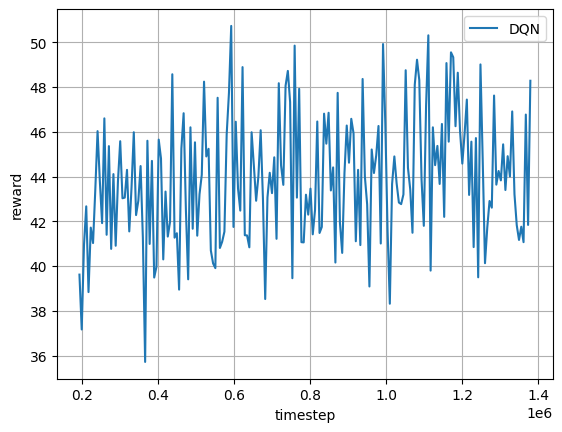

In [61]:
csv_path, fig_path = logger.csv_path, logger.fig_path
plot_curve(csv_path, fig_path, "DQN")

In [62]:
human_agent = TuteHumanAgent(player=1, tute=env.game)
env.set_agents([agent, human_agent])

In [63]:
trajectories, player_wins = env.run(is_training=False)

Player 2 swapped el siete de copas for el dos de copas
Player 1 played el rey de oros


================= Trump =================
el dos de copas


================ Face up ================
el rey de oros


=============== Your Hand ===============
1: el siete de oros
2: la sota de espadas
3: el caballo de copas
4: la sota de oros
5: el caballo de espadas
6: el dos de oros
7: el cinco de oros
8: el siete de copas
1  2  3  4  5  6  7  8 ? 8

Player 2 played el siete de copas
Player 2 won trick


================= Trump =================
el dos de copas


=============== Your Hand ===============
1: el siete de oros
2: la sota de espadas
3: el caballo de copas
4: la sota de oros
5: el caballo de espadas
6: el dos de oros
7: el cinco de oros
8: el cinco de bastos
1  2  3  4  5  6  7  8 ? 1

Player 2 played el siete de oros
Player 1 played el as de oros
Player 1 won trick
Player 1 played el seis de oros


================= Trump =================
el dos de copas


================ Face up 

KeyboardInterrupt: Interrupted by user

In [54]:
player_wins

array([ 47, 103])

### Train Deep Monte Carlo model

In [6]:
env = rlcard.make('tute')
# Initialize the DMC trainer
trainer = DMCTrainer(
    env,
    cuda="cuda",
    xpid="tute",
    savedir="dmc_results",
    save_interval=1,
)

# Train DMC Agents
trainer.start()

Found log directory: ./tute
INFO:palaas/out:Found log directory: ./tute
Saving arguments to ./tute/meta.json
INFO:palaas/out:Saving arguments to ./tute/meta.json
Path to meta file already exists. Not overriding meta.
Saving messages to ./tute/out.log
INFO:palaas/out:Saving messages to ./tute/out.log
Path to message file already exists. New data will be appended.
Saving logs data to ./tute/logs.csv
INFO:palaas/out:Saving logs data to ./tute/logs.csv
Saving logs' fields to ./tute/fields.csv
INFO:palaas/out:Saving logs' fields to ./tute/fields.csv
Path to log file already exists. New data will be appended.
[INFO:382686 utils:108 2022-09-17 07:53:06,135] Device 0 Actor 0 started.
[INFO:382707 utils:108 2022-09-17 07:53:06,150] Device 0 Actor 1 started.
[INFO:382783 utils:108 2022-09-17 07:53:06,155] Device 0 Actor 4 started.
[INFO:382751 utils:108 2022-09-17 07:53:06,168] Device 0 Actor 3 started.
[INFO:382719 utils:108 2022-09-17 07:53:06,189] Device 0 Actor 2 started.
[INFO:382627 traine

[INFO:382627 trainer:367 2022-09-17 07:55:40,018] After 70400 frames: @ 0.0 fps Stats:
{'loss_0': 535.5126342773438,
 'loss_1': 5068.35693359375,
 'mean_episode_return_0': 39.71477508544922,
 'mean_episode_return_1': 99.9205322265625}
[INFO:382627 trainer:367 2022-09-17 07:55:45,024] After 76800 frames: @ 1278.7 fps Stats:
{'loss_0': 644.5721435546875,
 'loss_1': 3538.641845703125,
 'mean_episode_return_0': 39.89739990234375,
 'mean_episode_return_1': 99.9297103881836}
[INFO:382627 trainer:367 2022-09-17 07:55:50,030] After 76800 frames: @ 0.0 fps Stats:
{'loss_0': 644.5721435546875,
 'loss_1': 3538.641845703125,
 'mean_episode_return_0': 39.89739990234375,
 'mean_episode_return_1': 99.9297103881836}
[INFO:382627 trainer:367 2022-09-17 07:55:55,036] After 80000 frames: @ 639.3 fps Stats:
{'loss_0': 513.0817260742188,
 'loss_1': 3538.641845703125,
 'mean_episode_return_0': 39.614906311035156,
 'mean_episode_return_1': 99.9297103881836}
[INFO:382627 trainer:367 2022-09-17 07:56:00,040] A

[INFO:382627 trainer:367 2022-09-17 07:58:30,463] After 156800 frames: @ 639.4 fps Stats:
{'loss_0': 363.05780029296875,
 'loss_1': 604.3056030273438,
 'mean_episode_return_0': 39.73324966430664,
 'mean_episode_return_1': 98.5272216796875}
[INFO:382627 trainer:367 2022-09-17 07:58:35,469] After 160000 frames: @ 639.3 fps Stats:
{'loss_0': 363.05780029296875,
 'loss_1': 393.2434387207031,
 'mean_episode_return_0': 39.73324966430664,
 'mean_episode_return_1': 98.31031036376953}
[INFO:382627 trainer:367 2022-09-17 07:58:40,475] After 163200 frames: @ 639.4 fps Stats:
{'loss_0': 403.0113525390625,
 'loss_1': 393.2434387207031,
 'mean_episode_return_0': 39.79543685913086,
 'mean_episode_return_1': 98.31031036376953}
[INFO:382627 trainer:367 2022-09-17 07:58:45,482] After 166400 frames: @ 639.4 fps Stats:
{'loss_0': 403.0113525390625,
 'loss_1': 590.2715454101562,
 'mean_episode_return_0': 39.79543685913086,
 'mean_episode_return_1': 98.04778289794922}
[INFO:382627 trainer:367 2022-09-17 07:

[INFO:382627 trainer:367 2022-09-17 08:01:20,934] After 243200 frames: @ 639.4 fps Stats:
{'loss_0': 268.77947998046875,
 'loss_1': 445.60076904296875,
 'mean_episode_return_0': 40.52927780151367,
 'mean_episode_return_1': 95.65721893310547}
[INFO:382627 trainer:367 2022-09-17 08:01:25,940] After 243200 frames: @ 0.0 fps Stats:
{'loss_0': 268.77947998046875,
 'loss_1': 445.60076904296875,
 'mean_episode_return_0': 40.52927780151367,
 'mean_episode_return_1': 95.65721893310547}
[INFO:382627 trainer:367 2022-09-17 08:01:30,946] After 246400 frames: @ 639.4 fps Stats:
{'loss_0': 266.2435607910156,
 'loss_1': 445.60076904296875,
 'mean_episode_return_0': 40.59407043457031,
 'mean_episode_return_1': 95.65721893310547}
[INFO:382627 trainer:367 2022-09-17 08:01:35,952] After 249600 frames: @ 639.4 fps Stats:
{'loss_0': 266.2435607910156,
 'loss_1': 357.42388916015625,
 'mean_episode_return_0': 40.59407043457031,
 'mean_episode_return_1': 95.49823760986328}
[INFO:382627 trainer:367 2022-09-17 

[INFO:382627 trainer:335 2022-09-17 08:04:11,308] Saving checkpoint to ./tute/model.tar
[INFO:382627 trainer:367 2022-09-17 08:04:11,402] After 326400 frames: @ 627.5 fps Stats:
{'loss_0': 286.8900451660156,
 'loss_1': 314.5917053222656,
 'mean_episode_return_0': 41.01458740234375,
 'mean_episode_return_1': 94.26371002197266}
[INFO:382627 trainer:367 2022-09-17 08:04:16,405] After 329600 frames: @ 639.7 fps Stats:
{'loss_0': 288.71923828125,
 'loss_1': 314.5917053222656,
 'mean_episode_return_0': 41.05445098876953,
 'mean_episode_return_1': 94.26371002197266}
[INFO:382627 trainer:367 2022-09-17 08:04:21,411] After 329600 frames: @ 0.0 fps Stats:
{'loss_0': 288.71923828125,
 'loss_1': 314.5917053222656,
 'mean_episode_return_0': 41.05445098876953,
 'mean_episode_return_1': 94.26371002197266}
[INFO:382627 trainer:367 2022-09-17 08:04:26,416] After 336000 frames: @ 1279.2 fps Stats:
{'loss_0': 333.3060607910156,
 'loss_1': 398.80035400390625,
 'mean_episode_return_0': 41.10790252685547,
 

[INFO:382627 trainer:367 2022-09-17 08:07:01,783] After 412800 frames: @ 1278.7 fps Stats:
{'loss_0': 286.2152404785156,
 'loss_1': 293.5096740722656,
 'mean_episode_return_0': 41.17394256591797,
 'mean_episode_return_1': 93.35203552246094}
[INFO:382627 trainer:367 2022-09-17 08:07:06,789] After 412800 frames: @ 0.0 fps Stats:
{'loss_0': 286.2152404785156,
 'loss_1': 293.5096740722656,
 'mean_episode_return_0': 41.17394256591797,
 'mean_episode_return_1': 93.35203552246094}
[INFO:382627 trainer:335 2022-09-17 08:07:11,795] Saving checkpoint to ./tute/model.tar
[INFO:382627 trainer:367 2022-09-17 08:07:11,885] After 419200 frames: @ 1256.2 fps Stats:
{'loss_0': 308.6073303222656,
 'loss_1': 357.0953674316406,
 'mean_episode_return_0': 41.17945098876953,
 'mean_episode_return_1': 93.31670379638672}
[INFO:382627 trainer:367 2022-09-17 08:07:16,891] After 419200 frames: @ 0.0 fps Stats:
{'loss_0': 308.6073303222656,
 'loss_1': 357.0953674316406,
 'mean_episode_return_0': 41.17945098876953,

[INFO:382627 trainer:367 2022-09-17 08:09:52,256] After 496000 frames: @ 639.3 fps Stats:
{'loss_0': 230.9375,
 'loss_1': 247.67300415039062,
 'mean_episode_return_0': 41.5555305480957,
 'mean_episode_return_1': 92.50220489501953}
[INFO:382627 trainer:367 2022-09-17 08:09:57,262] After 496000 frames: @ 0.0 fps Stats:
{'loss_0': 230.9375,
 'loss_1': 247.67300415039062,
 'mean_episode_return_0': 41.5555305480957,
 'mean_episode_return_1': 92.50220489501953}
[INFO:382627 trainer:367 2022-09-17 08:10:02,268] After 502400 frames: @ 1278.7 fps Stats:
{'loss_0': 234.0360565185547,
 'loss_1': 228.46044921875,
 'mean_episode_return_0': 41.58481216430664,
 'mean_episode_return_1': 92.4284439086914}
[INFO:382627 trainer:367 2022-09-17 08:10:07,274] After 502400 frames: @ 0.0 fps Stats:
{'loss_0': 234.0360565185547,
 'loss_1': 228.46044921875,
 'mean_episode_return_0': 41.58481216430664,
 'mean_episode_return_1': 92.4284439086914}
[INFO:382627 trainer:335 2022-09-17 08:10:12,280] Saving checkpoint

[INFO:382627 trainer:367 2022-09-17 08:12:42,727] After 579200 frames: @ 0.0 fps Stats:
{'loss_0': 263.62115478515625,
 'loss_1': 236.62181091308594,
 'mean_episode_return_0': 41.88571548461914,
 'mean_episode_return_1': 91.86226654052734}
[INFO:382627 trainer:367 2022-09-17 08:12:47,733] After 582400 frames: @ 639.4 fps Stats:
{'loss_0': 285.9555358886719,
 'loss_1': 236.62181091308594,
 'mean_episode_return_0': 41.91596984863281,
 'mean_episode_return_1': 91.86226654052734}
[INFO:382627 trainer:367 2022-09-17 08:12:52,739] After 585600 frames: @ 639.4 fps Stats:
{'loss_0': 285.9555358886719,
 'loss_1': 259.8332214355469,
 'mean_episode_return_0': 41.91596984863281,
 'mean_episode_return_1': 91.80293273925781}
[INFO:382627 trainer:367 2022-09-17 08:12:57,745] After 588800 frames: @ 639.4 fps Stats:
{'loss_0': 253.14425659179688,
 'loss_1': 259.8332214355469,
 'mean_episode_return_0': 41.93252944946289,
 'mean_episode_return_1': 91.80293273925781}
[INFO:382627 trainer:367 2022-09-17 08

[INFO:382627 trainer:367 2022-09-17 08:15:33,195] After 665600 frames: @ 639.4 fps Stats:
{'loss_0': 235.17132568359375,
 'loss_1': 305.6418151855469,
 'mean_episode_return_0': 42.208187103271484,
 'mean_episode_return_1': 91.33318328857422}
[INFO:382627 trainer:367 2022-09-17 08:15:38,201] After 665600 frames: @ 0.0 fps Stats:
{'loss_0': 235.17132568359375,
 'loss_1': 305.6418151855469,
 'mean_episode_return_0': 42.208187103271484,
 'mean_episode_return_1': 91.33318328857422}
[INFO:382627 trainer:367 2022-09-17 08:15:43,207] After 672000 frames: @ 1278.7 fps Stats:
{'loss_0': 297.1102294921875,
 'loss_1': 267.3381042480469,
 'mean_episode_return_0': 42.258750915527344,
 'mean_episode_return_1': 91.24738311767578}
[INFO:382627 trainer:367 2022-09-17 08:15:48,213] After 672000 frames: @ 0.0 fps Stats:
{'loss_0': 297.1102294921875,
 'loss_1': 267.3381042480469,
 'mean_episode_return_0': 42.258750915527344,
 'mean_episode_return_1': 91.24738311767578}
[INFO:382627 trainer:367 2022-09-17 0

[INFO:382627 trainer:367 2022-09-17 08:18:23,664] After 748800 frames: @ 0.0 fps Stats:
{'loss_0': 314.5562744140625,
 'loss_1': 224.2518768310547,
 'mean_episode_return_0': 42.934814453125,
 'mean_episode_return_1': 89.75188446044922}
[INFO:382627 trainer:367 2022-09-17 08:18:28,670] After 752000 frames: @ 639.3 fps Stats:
{'loss_0': 267.05133056640625,
 'loss_1': 224.2518768310547,
 'mean_episode_return_0': 42.9968147277832,
 'mean_episode_return_1': 89.75188446044922}
[INFO:382627 trainer:367 2022-09-17 08:18:33,676] After 755200 frames: @ 639.4 fps Stats:
{'loss_0': 267.05133056640625,
 'loss_1': 256.3342590332031,
 'mean_episode_return_0': 42.9968147277832,
 'mean_episode_return_1': 89.66564178466797}
[INFO:382627 trainer:367 2022-09-17 08:18:38,682] After 755200 frames: @ 0.0 fps Stats:
{'loss_0': 267.05133056640625,
 'loss_1': 256.3342590332031,
 'mean_episode_return_0': 42.9968147277832,
 'mean_episode_return_1': 89.66564178466797}
[INFO:382627 trainer:367 2022-09-17 08:18:43,6

[INFO:382627 trainer:335 2022-09-17 08:21:14,021] Saving checkpoint to ./tute/model.tar
[INFO:382627 trainer:367 2022-09-17 08:21:14,103] After 832000 frames: @ 0.0 fps Stats:
{'loss_0': 248.55856323242188,
 'loss_1': 240.82752990722656,
 'mean_episode_return_0': 43.575565338134766,
 'mean_episode_return_1': 88.91282653808594}
[INFO:382627 trainer:367 2022-09-17 08:21:19,104] After 838400 frames: @ 1280.0 fps Stats:
{'loss_0': 288.69464111328125,
 'loss_1': 312.6985168457031,
 'mean_episode_return_0': 43.593875885009766,
 'mean_episode_return_1': 88.91282653808594}
[INFO:382627 trainer:367 2022-09-17 08:21:24,110] After 838400 frames: @ 0.0 fps Stats:
{'loss_0': 288.69464111328125,
 'loss_1': 312.6985168457031,
 'mean_episode_return_0': 43.593875885009766,
 'mean_episode_return_1': 88.91282653808594}
[INFO:382627 trainer:367 2022-09-17 08:21:29,116] After 841600 frames: @ 639.4 fps Stats:
{'loss_0': 253.6949005126953,
 'loss_1': 312.6985168457031,
 'mean_episode_return_0': 43.646812438

[INFO:382627 trainer:367 2022-09-17 08:23:59,459] After 915200 frames: @ 639.4 fps Stats:
{'loss_0': 285.5872497558594,
 'loss_1': 398.01708984375,
 'mean_episode_return_0': 44.02375030517578,
 'mean_episode_return_1': 88.73155975341797}
[INFO:382627 trainer:367 2022-09-17 08:24:04,465] After 918400 frames: @ 639.4 fps Stats:
{'loss_0': 258.9454345703125,
 'loss_1': 398.01708984375,
 'mean_episode_return_0': 44.02481460571289,
 'mean_episode_return_1': 88.73155975341797}
[INFO:382627 trainer:367 2022-09-17 08:24:09,471] After 921600 frames: @ 639.4 fps Stats:
{'loss_0': 258.9454345703125,
 'loss_1': 317.2895202636719,
 'mean_episode_return_0': 44.02481460571289,
 'mean_episode_return_1': 88.73050689697266}
[INFO:382627 trainer:335 2022-09-17 08:24:14,476] Saving checkpoint to ./tute/model.tar
[INFO:382627 trainer:367 2022-09-17 08:24:14,564] After 924800 frames: @ 628.4 fps Stats:
{'loss_0': 241.9735565185547,
 'loss_1': 317.2895202636719,
 'mean_episode_return_0': 44.06012725830078,
 

[INFO:382627 trainer:367 2022-09-17 08:26:49,926] After 1001600 frames: @ 1278.7 fps Stats:
{'loss_0': 283.6014404296875,
 'loss_1': 283.53399658203125,
 'mean_episode_return_0': 44.75231170654297,
 'mean_episode_return_1': 88.65261840820312}
[INFO:382627 trainer:367 2022-09-17 08:26:54,932] After 1001600 frames: @ 0.0 fps Stats:
{'loss_0': 283.6014404296875,
 'loss_1': 283.53399658203125,
 'mean_episode_return_0': 44.75231170654297,
 'mean_episode_return_1': 88.65261840820312}
[INFO:382627 trainer:367 2022-09-17 08:26:59,934] After 1004800 frames: @ 639.9 fps Stats:
{'loss_0': 283.6014404296875,
 'loss_1': 335.8243713378906,
 'mean_episode_return_0': 44.75231170654297,
 'mean_episode_return_1': 88.63204956054688}
[INFO:382627 trainer:367 2022-09-17 08:27:04,939] After 1008000 frames: @ 639.4 fps Stats:
{'loss_0': 313.28558349609375,
 'loss_1': 335.8243713378906,
 'mean_episode_return_0': 44.79437255859375,
 'mean_episode_return_1': 88.63204956054688}
[INFO:382627 trainer:367 2022-09-1

[INFO:382627 trainer:367 2022-09-17 08:29:35,382] After 1084800 frames: @ 1278.7 fps Stats:
{'loss_0': 317.7527770996094,
 'loss_1': 319.32659912109375,
 'mean_episode_return_0': 45.57475662231445,
 'mean_episode_return_1': 88.53076171875}
[INFO:382627 trainer:367 2022-09-17 08:29:40,384] After 1084800 frames: @ 0.0 fps Stats:
{'loss_0': 317.7527770996094,
 'loss_1': 319.32659912109375,
 'mean_episode_return_0': 45.57475662231445,
 'mean_episode_return_1': 88.53076171875}
[INFO:382627 trainer:367 2022-09-17 08:29:45,388] After 1084800 frames: @ 0.0 fps Stats:
{'loss_0': 317.7527770996094,
 'loss_1': 319.32659912109375,
 'mean_episode_return_0': 45.57475662231445,
 'mean_episode_return_1': 88.53076171875}
[INFO:382627 trainer:367 2022-09-17 08:29:50,394] After 1091200 frames: @ 1278.7 fps Stats:
{'loss_0': 268.22467041015625,
 'loss_1': 228.91842651367188,
 'mean_episode_return_0': 45.62950134277344,
 'mean_episode_return_1': 88.52903747558594}
[INFO:382627 trainer:367 2022-09-17 08:29:

[INFO:382627 trainer:367 2022-09-17 08:32:25,842] After 1168000 frames: @ 639.4 fps Stats:
{'loss_0': 291.0717468261719,
 'loss_1': 403.04412841796875,
 'mean_episode_return_0': 46.14806365966797,
 'mean_episode_return_1': 88.75443267822266}
[INFO:382627 trainer:367 2022-09-17 08:32:30,848] After 1168000 frames: @ 0.0 fps Stats:
{'loss_0': 291.0717468261719,
 'loss_1': 403.04412841796875,
 'mean_episode_return_0': 46.14806365966797,
 'mean_episode_return_1': 88.75443267822266}
[INFO:382627 trainer:367 2022-09-17 08:32:35,854] After 1174400 frames: @ 1278.7 fps Stats:
{'loss_0': 280.39300537109375,
 'loss_1': 311.8927917480469,
 'mean_episode_return_0': 46.19049835205078,
 'mean_episode_return_1': 88.79075622558594}
[INFO:382627 trainer:367 2022-09-17 08:32:40,860] After 1174400 frames: @ 0.0 fps Stats:
{'loss_0': 280.39300537109375,
 'loss_1': 311.8927917480469,
 'mean_episode_return_0': 46.19049835205078,
 'mean_episode_return_1': 88.79075622558594}
[INFO:382627 trainer:367 2022-09-17

[INFO:382627 trainer:335 2022-09-17 08:35:16,222] Saving checkpoint to ./tute/model.tar
[INFO:382627 trainer:367 2022-09-17 08:35:16,287] After 1251200 frames: @ 0.0 fps Stats:
{'loss_0': 271.7583923339844,
 'loss_1': 326.0079650878906,
 'mean_episode_return_0': 46.83506393432617,
 'mean_episode_return_1': 88.91336059570312}
[INFO:382627 trainer:367 2022-09-17 08:35:21,292] After 1254400 frames: @ 639.6 fps Stats:
{'loss_0': 244.69680786132812,
 'loss_1': 326.0079650878906,
 'mean_episode_return_0': 46.88325119018555,
 'mean_episode_return_1': 88.91336059570312}
[INFO:382627 trainer:367 2022-09-17 08:35:26,298] After 1257600 frames: @ 639.4 fps Stats:
{'loss_0': 244.69680786132812,
 'loss_1': 251.17271423339844,
 'mean_episode_return_0': 46.88325119018555,
 'mean_episode_return_1': 88.95146179199219}
[INFO:382627 trainer:367 2022-09-17 08:35:31,300] After 1257600 frames: @ 0.0 fps Stats:
{'loss_0': 244.69680786132812,
 'loss_1': 251.17271423339844,
 'mean_episode_return_0': 46.88325119

[INFO:382627 trainer:367 2022-09-17 08:38:01,650] After 1334400 frames: @ 639.4 fps Stats:
{'loss_0': 373.6921081542969,
 'loss_1': 431.06689453125,
 'mean_episode_return_0': 47.61487579345703,
 'mean_episode_return_1': 88.98301696777344}
[INFO:382627 trainer:367 2022-09-17 08:38:06,656] After 1337600 frames: @ 639.4 fps Stats:
{'loss_0': 293.68914794921875,
 'loss_1': 431.06689453125,
 'mean_episode_return_0': 47.64287567138672,
 'mean_episode_return_1': 88.98301696777344}
[INFO:382627 trainer:367 2022-09-17 08:38:11,662] After 1337600 frames: @ 0.0 fps Stats:
{'loss_0': 293.68914794921875,
 'loss_1': 431.06689453125,
 'mean_episode_return_0': 47.64287567138672,
 'mean_episode_return_1': 88.98301696777344}
[INFO:382627 trainer:335 2022-09-17 08:38:16,668] Saving checkpoint to ./tute/model.tar
[INFO:382627 trainer:367 2022-09-17 08:38:16,758] After 1340800 frames: @ 628.0 fps Stats:
{'loss_0': 293.68914794921875,
 'loss_1': 404.7033386230469,
 'mean_episode_return_0': 47.64287567138672

[INFO:382627 trainer:367 2022-09-17 08:40:52,119] After 1417600 frames: @ 639.4 fps Stats:
{'loss_0': 318.3800964355469,
 'loss_1': 475.4580993652344,
 'mean_episode_return_0': 48.198123931884766,
 'mean_episode_return_1': 89.48465728759766}
[INFO:382627 trainer:367 2022-09-17 08:40:57,124] After 1420800 frames: @ 639.4 fps Stats:
{'loss_0': 325.23529052734375,
 'loss_1': 475.4580993652344,
 'mean_episode_return_0': 48.28262710571289,
 'mean_episode_return_1': 89.48465728759766}
[INFO:382627 trainer:367 2022-09-17 08:41:02,130] After 1420800 frames: @ 0.0 fps Stats:
{'loss_0': 325.23529052734375,
 'loss_1': 475.4580993652344,
 'mean_episode_return_0': 48.28262710571289,
 'mean_episode_return_1': 89.48465728759766}
[INFO:382627 trainer:367 2022-09-17 08:41:07,133] After 1427200 frames: @ 1279.6 fps Stats:
{'loss_0': 313.1060791015625,
 'loss_1': 325.38397216796875,
 'mean_episode_return_0': 48.31312561035156,
 'mean_episode_return_1': 89.51731872558594}
[INFO:382627 trainer:367 2022-09-

[INFO:382627 trainer:367 2022-09-17 08:43:42,594] After 1504000 frames: @ 1278.7 fps Stats:
{'loss_0': 333.3717956542969,
 'loss_1': 386.2171325683594,
 'mean_episode_return_0': 48.75868606567383,
 'mean_episode_return_1': 90.13096618652344}
[INFO:382627 trainer:367 2022-09-17 08:43:47,600] After 1504000 frames: @ 0.0 fps Stats:
{'loss_0': 333.3717956542969,
 'loss_1': 386.2171325683594,
 'mean_episode_return_0': 48.75868606567383,
 'mean_episode_return_1': 90.13096618652344}
[INFO:382627 trainer:367 2022-09-17 08:43:52,606] After 1510400 frames: @ 1278.7 fps Stats:
{'loss_0': 254.8771209716797,
 'loss_1': 405.5745544433594,
 'mean_episode_return_0': 48.786190032958984,
 'mean_episode_return_1': 90.17213439941406}
[INFO:382627 trainer:367 2022-09-17 08:43:57,612] After 1510400 frames: @ 0.0 fps Stats:
{'loss_0': 254.8771209716797,
 'loss_1': 405.5745544433594,
 'mean_episode_return_0': 48.786190032958984,
 'mean_episode_return_1': 90.17213439941406}
[INFO:382627 trainer:367 2022-09-17 

[INFO:382627 trainer:367 2022-09-17 08:46:33,044] After 1587200 frames: @ 0.0 fps Stats:
{'loss_0': 389.66009521484375,
 'loss_1': 367.7574768066406,
 'mean_episode_return_0': 49.500247955322266,
 'mean_episode_return_1': 90.49540710449219}
[INFO:382627 trainer:367 2022-09-17 08:46:38,050] After 1590400 frames: @ 639.4 fps Stats:
{'loss_0': 288.84033203125,
 'loss_1': 367.7574768066406,
 'mean_episode_return_0': 49.55056381225586,
 'mean_episode_return_1': 90.49540710449219}
[INFO:382627 trainer:367 2022-09-17 08:46:43,056] After 1593600 frames: @ 639.4 fps Stats:
{'loss_0': 288.84033203125,
 'loss_1': 319.0353698730469,
 'mean_episode_return_0': 49.55056381225586,
 'mean_episode_return_1': 90.50861358642578}
[INFO:382627 trainer:367 2022-09-17 08:46:48,062] After 1593600 frames: @ 0.0 fps Stats:
{'loss_0': 288.84033203125,
 'loss_1': 319.0353698730469,
 'mean_episode_return_0': 49.55056381225586,
 'mean_episode_return_1': 90.50861358642578}
[INFO:382627 trainer:367 2022-09-17 08:46:53

[INFO:382627 trainer:367 2022-09-17 08:49:18,512] After 1670400 frames: @ 627.1 fps Stats:
{'loss_0': 324.0245666503906,
 'loss_1': 433.59991455078125,
 'mean_episode_return_0': 49.84081268310547,
 'mean_episode_return_1': 91.07550811767578}
[INFO:382627 trainer:367 2022-09-17 08:49:23,518] After 1673600 frames: @ 639.4 fps Stats:
{'loss_0': 356.8758850097656,
 'loss_1': 433.59991455078125,
 'mean_episode_return_0': 49.88249969482422,
 'mean_episode_return_1': 91.07550811767578}
[INFO:382627 trainer:367 2022-09-17 08:49:28,524] After 1676800 frames: @ 639.4 fps Stats:
{'loss_0': 356.8758850097656,
 'loss_1': 496.2378845214844,
 'mean_episode_return_0': 49.88249969482422,
 'mean_episode_return_1': 91.13118743896484}
[INFO:382627 trainer:367 2022-09-17 08:49:33,530] After 1676800 frames: @ 0.0 fps Stats:
{'loss_0': 356.8758850097656,
 'loss_1': 496.2378845214844,
 'mean_episode_return_0': 49.88249969482422,
 'mean_episode_return_1': 91.13118743896484}
[INFO:382627 trainer:367 2022-09-17 

[INFO:382627 trainer:367 2022-09-17 08:52:08,868] After 1753600 frames: @ 0.0 fps Stats:
{'loss_0': 309.3163146972656,
 'loss_1': 460.3263244628906,
 'mean_episode_return_0': 50.16550064086914,
 'mean_episode_return_1': 91.86664581298828}
[INFO:382627 trainer:367 2022-09-17 08:52:13,874] After 1756800 frames: @ 639.4 fps Stats:
{'loss_0': 344.48260498046875,
 'loss_1': 460.3263244628906,
 'mean_episode_return_0': 50.208065032958984,
 'mean_episode_return_1': 91.86664581298828}
[INFO:382627 trainer:335 2022-09-17 08:52:18,880] Saving checkpoint to ./tute/model.tar
[INFO:382627 trainer:367 2022-09-17 08:52:18,973] After 1760000 frames: @ 627.7 fps Stats:
{'loss_0': 344.48260498046875,
 'loss_1': 463.4032287597656,
 'mean_episode_return_0': 50.208065032958984,
 'mean_episode_return_1': 91.89350128173828}
[INFO:382627 trainer:367 2022-09-17 08:52:23,979] After 1763200 frames: @ 639.4 fps Stats:
{'loss_0': 350.5543212890625,
 'loss_1': 463.4032287597656,
 'mean_episode_return_0': 50.2398757

[INFO:382627 trainer:367 2022-09-17 08:54:54,334] After 1836800 frames: @ 639.3 fps Stats:
{'loss_0': 333.9613952636719,
 'loss_1': 541.9381103515625,
 'mean_episode_return_0': 50.52199935913086,
 'mean_episode_return_1': 92.82091522216797}
[INFO:382627 trainer:367 2022-09-17 08:54:59,340] After 1840000 frames: @ 639.4 fps Stats:
{'loss_0': 258.544921875,
 'loss_1': 541.9381103515625,
 'mean_episode_return_0': 50.50606155395508,
 'mean_episode_return_1': 92.82091522216797}
[INFO:382627 trainer:367 2022-09-17 08:55:04,346] After 1843200 frames: @ 639.3 fps Stats:
{'loss_0': 258.544921875,
 'loss_1': 461.3760986328125,
 'mean_episode_return_0': 50.50606155395508,
 'mean_episode_return_1': 92.9185562133789}
[INFO:382627 trainer:367 2022-09-17 08:55:09,352] After 1846400 frames: @ 639.4 fps Stats:
{'loss_0': 347.74359130859375,
 'loss_1': 461.3760986328125,
 'mean_episode_return_0': 50.51418685913086,
 'mean_episode_return_1': 92.9185562133789}
[INFO:382627 trainer:367 2022-09-17 08:55:14,

In [16]:
trainer.model_func('0').get_agent(0)

In [25]:
human_agent = TuteHumanAgent(player=1, tute=env.game)
env.set_agents([trainer.model_func('0').get_agent(0), human_agent])

In [26]:
trajectories, player_wins = env.run(is_training=False)

Player 2 swapped el siete de bastos for el dos de bastos
Player 1 played el caballo de copas


================= Trump =================
el dos de bastos


================ Face up ================
el caballo de copas


=============== Your Hand ===============
1: el tres de espadas
2: el cuatro de bastos
3: el tres de oros
4: el rey de copas
5: el as de espadas
6: el rey de espadas
7: el dos de oros
8: el siete de bastos
1  2  3  4  5  6  7  8 ? 2

Player 2 played el cuatro de bastos
Player 2 won trick


================= Trump =================
el dos de bastos


=============== Your Hand ===============
1: el tres de espadas
2: el tres de oros
3: el rey de copas
4: el as de espadas
5: el rey de espadas
6: el dos de oros
7: el siete de bastos
8: el rey de oros
1  2  3  4  5  6  7  8 ? 6

Player 2 played el dos de oros
Player 1 played el cinco de bastos
Player 1 won trick
Player 1 played el cuatro de espadas


================= Trump =================
el dos de bastos


==============

KeyboardInterrupt: Interrupted by user